# Analiza troškova komunalnih usluga na području grada Petrinje

## Učitavanje podataka

Učitavanje potrebnih programskih knjižnica za analizu i obradu podataka. 

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from prettytable import PrettyTable

Učitavanje podataka u pandas dataframe.

In [193]:
df = pd.read_excel('isplate.xlsx')
df = df.iloc[:, :11]
df.drop_duplicates(keep='first')

df.head()

,Datum,Primatelj,OIB,Mjesto,Broj računa,Opis,Iznos,Datum računa,Datum dospijeća,IBAN,Proračunski Korisnik
0,2023-01-13T00:00:00.000Z,POSLOVNE ZONE PETRINJA D.O.O.,95901449200,44250 Petrinja,1166-POSL111-1,r- 2628 - ODRŽAVANJE 12-2022,25533.8,2022-12-30T00:00:00.000Z,2022-12-30T00:00:00.000Z,HR0824020061100574009,NaN
1,2023-01-13T00:00:00.000Z,CODE ARCHITECT D.O.O.,79015812022,10000 Zagreb,53-VP1-1,r- 2052 - ARHITEKTONSKA SNIMKA POSTOJEĆEG STAN...,2986.26,2022-10-21T00:00:00.000Z,2022-11-17T00:00:00.000Z,HR1624020061100887563,NaN
2,2023-01-12T00:00:00.000Z,BELONA D.O.O.,37208339420,44250 Petrinja,874-P2-1-1,"Belona, ostali materijal",4.53,2022-12-31T00:00:00.000Z,2022-09-12T00:00:00.000Z,HR5123600001101212322,DJEČJI VRTIĆ PETRINJČICA
3,2023-01-12T00:00:00.000Z,PEPA NET J.D.O.O.,22442802027,10370 Dugo Selo,55/01/221,Racun br.: 55/01/221,598.54,2022-12-31T00:00:00.000Z,2022-12-26T00:00:00.000Z,HR4723600001102641689,DJEČJI VRTIĆ PETRINJČICA
4,2023-01-12T00:00:00.000Z,INSTITUT IGH D.D.,79766124714,10000 Zagreb,2899-ZG-49048,r- 2503 - ISPITIVANJE MATERIJALA I ISPITIVANJE...,1990.84,2022-11-30T00:00:00.000Z,2023-01-04T00:00:00.000Z,HR7723600001101243767,NaN


In [194]:
df['Proračunski Korisnik'].fillna('Grad Petrinja', inplace=True)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5260 entries, 0 to 5259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Datum                 5260 non-null   object
 1   Primatelj             5260 non-null   object
 2   OIB                   5260 non-null   object
 3   Mjesto                5260 non-null   object
 4   Broj računa           5260 non-null   object
 5   Opis                  5260 non-null   object
 6   Iznos                 5260 non-null   object
 7   Datum računa          5260 non-null   object
 8   Datum dospijeća       5260 non-null   object
 9   IBAN                  5153 non-null   object
 10  Proračunski Korisnik  5260 non-null   object
dtypes: object(11)
memory usage: 452.2+ KB


In [196]:
df.describe()

,Datum,Primatelj,OIB,Mjesto,Broj računa,Opis,Iznos,Datum računa,Datum dospijeća,IBAN,Proračunski Korisnik
count,5260,5260,5260,5260,5260,5260,5260,5260,5260,5153,5260
unique,225,583,581,89,4712,3351,3446,368,438,619,7
top,2023-12-22T00:00:00.000Z,PRIVREDA D.O.O.,12266526926,10000 Zagreb,9922004437,Plaćanje po računu,vlj.18,2022-12-31T00:00:00.000Z,2023-06-30T00:00:00.000Z,HR4924020061100580740,Grad Petrinja
freq,412,418,418,2125,7,276,68,234,87,326,2822


Veličina podatkovnog skupa

In [197]:
df.shape

(5260, 11)

## Sortiranje podataka prema datumu isplate

In [198]:
print(type(df.Datum[0]))

<class 'str'>


Sortiranje podataka i dodavanje dodatnog stupca za identifikaciju troškova po mjesecima.

In [199]:
df['Datum'] = pd.to_datetime(df['Datum'], errors='coerce')
df['Mjesec'] = df['Datum'].dt.month
df['Datum'] = df['Datum'].dt.date

print(df['Datum'])

0       2023-01-13
1       2023-01-13
2       2023-01-12
3       2023-01-12
4       2023-01-12
           ...    
5255    2023-09-15
5256    2023-09-15
5257    2023-09-15
5258    2023-09-15
5259    2023-09-15
Name: Datum, Length: 5260, dtype: object


In [200]:
df = df.dropna(subset=['Datum'])

sorted_df = df.sort_values(by='Datum')
sorted_df.reset_index()

,index,Datum,Primatelj,OIB,Mjesto,Broj računa,Opis,Iznos,Datum računa,Datum dospijeća,IBAN,Proračunski Korisnik,Mjesec
0,15,2023-01-09,VOX ARTES,64439050823,51521 Punat,68/VOX/3,r- 2603 - POSTAVLJANJE ALU TRUSS KONSTRUKCIJE,4379.85,2022-12-31T00:00:00.000Z,2022-12-31T00:00:00.000Z,HR0624020061140321638,Grad Petrinja,1.0
1,14,2023-01-10,HRVATSKA POŠTANSKA BANKA D.D.,87939104217,10000 Zagreb,9920536542-222529,kamate 12-22; kredit 9920536542,3945.32,2022-12-30T00:00:00.000Z,2022-12-31T00:00:00.000Z,HR4623900011070000029,Grad Petrinja,1.0
2,11,2023-01-10,HRVATSKA POŠTANSKA BANKA D.D.,87939104217,10000 Zagreb,9922004437,"kamata 12-22, kredit 9920492265",0.01,2023-02-27T00:00:00.000Z,2023-02-28T00:00:00.000Z,HR4623900011070000029,Grad Petrinja,1.0
3,12,2023-01-10,HRVATSKA POŠTANSKA BANKA D.D.,87939104217,10000 Zagreb,9920540725-222526,kamata 12-22 9920540725,448.89,2022-12-30T00:00:00.000Z,2022-12-31T00:00:00.000Z,HR4623900011070000029,Grad Petrinja,1.0
4,13,2023-01-10,HRVATSKA POŠTANSKA BANKA D.D.,87939104217,10000 Zagreb,9920506545-222528,kamata 12-22; kredit 9920506545,624.58,2022-12-30T00:00:00.000Z,2022-12-31T00:00:00.000Z,HR4623900011070000029,Grad Petrinja,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5254,1339,2023-12-29,PETROL PROM D.O.O.,32609134262,44250 Petrinja,86/1/4,21.P.S. TRŽNICA (PETROL PROM),55529.63,2023-11-30T00:00:00.000Z,2023-12-30T00:00:00.000Z,HR7823600001102165637,Grad Petrinja,12.0
5255,1338,2023-12-29,PETROL PROM D.O.O.,32609134262,44250 Petrinja,89/1/4,22.P.S. TRŽNICA (PETROL PROM),8041.38,2023-12-22T00:00:00.000Z,2024-01-21T00:00:00.000Z,HR6124070001100133864,Grad Petrinja,12.0
5256,1337,2023-12-29,PETROL PROM D.O.O.,32609134262,44250 Petrinja,86/1/4,21.P.S. REKONSTRUKCIJA TRŽNICE,66972.03,2023-11-30T00:00:00.000Z,2023-12-30T00:00:00.000Z,HR4923400091110918910,Grad Petrinja,12.0
5257,1345,2023-12-29,EPTISA ADRIA D.O.O.,28457369235,10000 Zagreb,595-1-1,Usluga koordinatora zaš tte na radu tijekom pr...,452.81,2023-10-31T00:00:00.000Z,2023-12-09T00:00:00.000Z,HR5823400091110524637,PUČKO OTVORENO UČILIŠTE,12.0


In [201]:
df = sorted_df.reset_index(drop=True)

Uklanjanje podataka koji nemaju iznos računa.

In [202]:
df = df.dropna(subset=['Iznos'])

In [203]:
df['Iznos'] = pd.to_numeric(df['Iznos'], errors='coerce')
df = df.dropna(subset=['Iznos'])

In [204]:
print(f'Dostupni vremenski niz: {df["Datum"].iloc[0]} do {df["Datum"].iloc[-1]}')

Dostupni vremenski niz: 2023-01-09 do 2023-12-31


# Statistička analiza podataka

### Ukupni godišnji trošak grada Petrinje:

In [205]:
print(f"Ukupni godišnji trošak grada Petrinje iznosi: {'€{:,.2f}'.format(df['Iznos'].sum())} €.")

Ukupni godišnji trošak grada Petrinje iznosi: €36,636,631.16 €.


### Trošak grada Petrinje podijeljen po mjesecima:

In [206]:
df.groupby('Mjesec')['Iznos'].sum()

Mjesec
1.0     1291108.83
2.0     2080844.98
3.0     1839001.26
4.0     4370971.24
5.0     3392091.17
6.0     7256849.26
7.0     1096301.00
8.0     1079550.88
9.0     2184590.27
10.0    2204629.49
11.0    2378749.40
12.0    7461943.38
Name: Iznos, dtype: float64

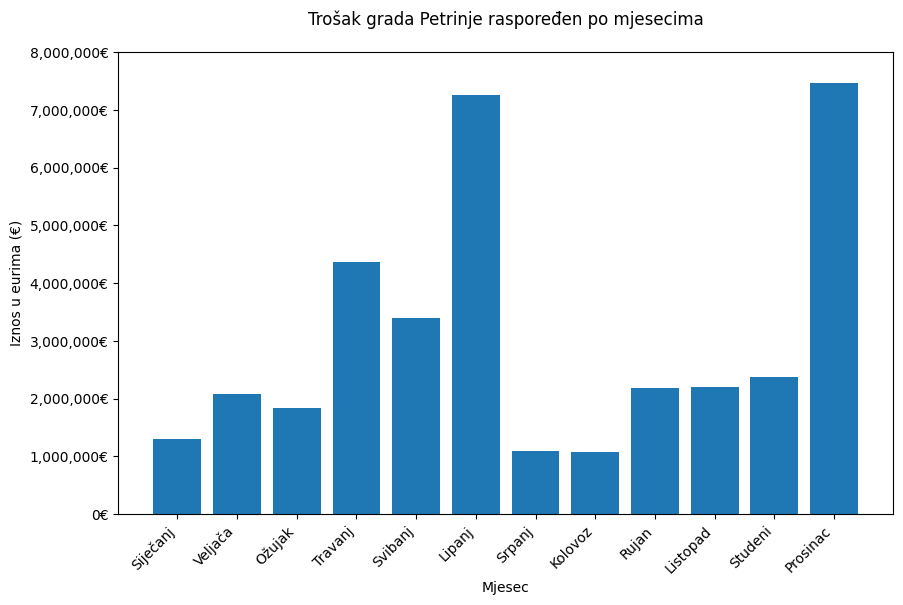

In [207]:
mjeseci = ['Siječanj', 'Veljača', 'Ožujak', 'Travanj', 'Svibanj', 'Lipanj', 'Srpanj', 'Kolovoz', 'Rujan','Listopad', 'Studeni', 'Prosinac']
plt.figure(figsize=(10, 6))
plt.bar(mjeseci, df.groupby('Mjesec')['Iznos'].sum())
plt.xticks(mjeseci, rotation=45, ha='right')
current_values = plt.gca().get_yticks()
plt.gca().set_yticks(current_values)
plt.gca().set_yticklabels(['{:,.0f}€'.format(x) for x in current_values])
plt.ylabel('Iznos u eurima (€)')
plt.xlabel('Mjesec')
plt.title('Trošak grada Petrinje raspoređen po mjesecima', pad=20)
plt.show()

### 10 najvećih troškova proračuna grada Petrinje

In [208]:
top_10 = df.sort_values(by='Iznos', ascending=False)
top_10 = top_10.head(10)

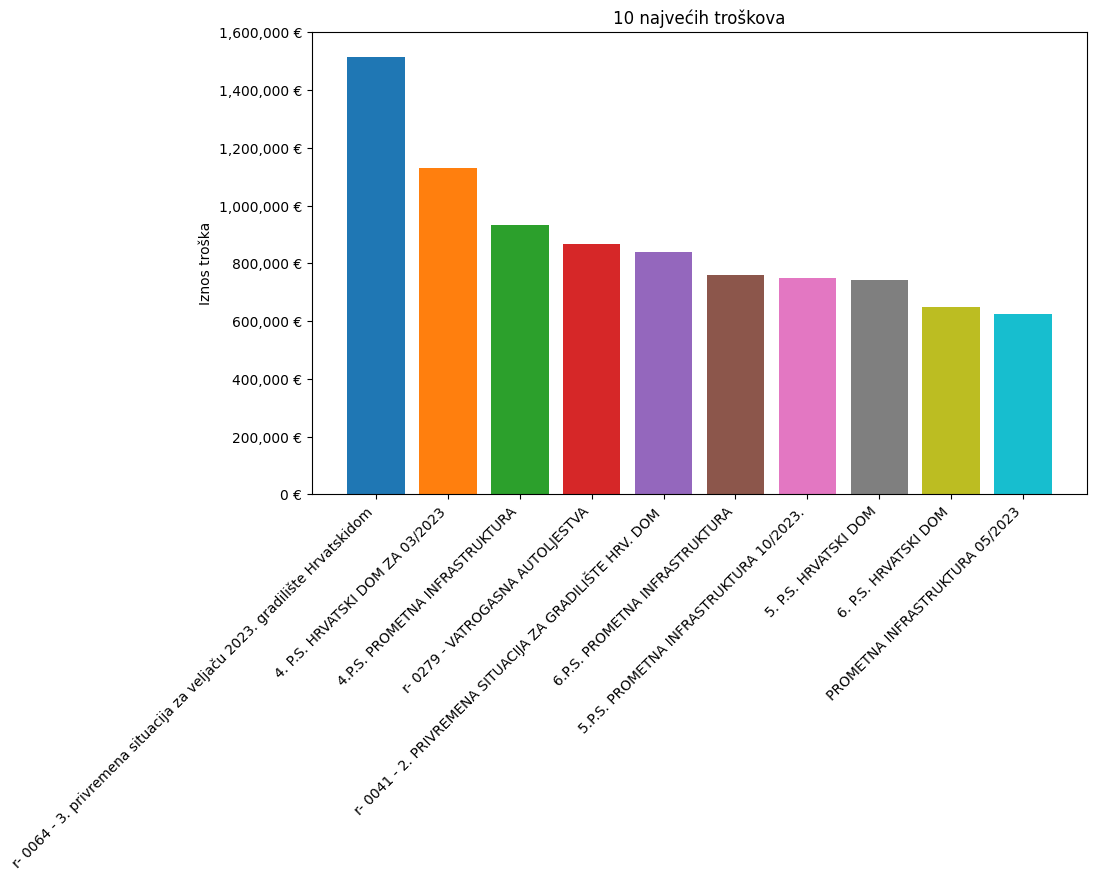

In [209]:
plt.figure(figsize=(10, 6))
for index, row in top_10.iterrows():
    plt.bar(row['Opis'], row['Iznos'], label=f"{row['Opis']}: {row['Iznos']:.2f}")
plt.ylabel('Iznos troška')
plt.title('10 najvećih troškova')
plt.xticks(rotation=45, ha='right')
current_values = plt.gca().get_yticks()
plt.gca().set_yticks(current_values)
plt.gca().set_yticklabels(['{:,.0f} €'.format(x) for x in current_values])
plt.show()

### Prikaz pojedinih korisnika proračuna prema visini troškova

In [210]:
korisnici = df.groupby('Proračunski Korisnik')['Iznos'].sum()
korisnici = korisnici.drop('Grad Petrinja') ## koristi većinu proračuna -->  zato je uklonjeno

In [211]:
def absolute_value(val):
    a  = int(np.round(val/100.*korisnici.sum()))
    return '{:,.0f} €'.format(a)

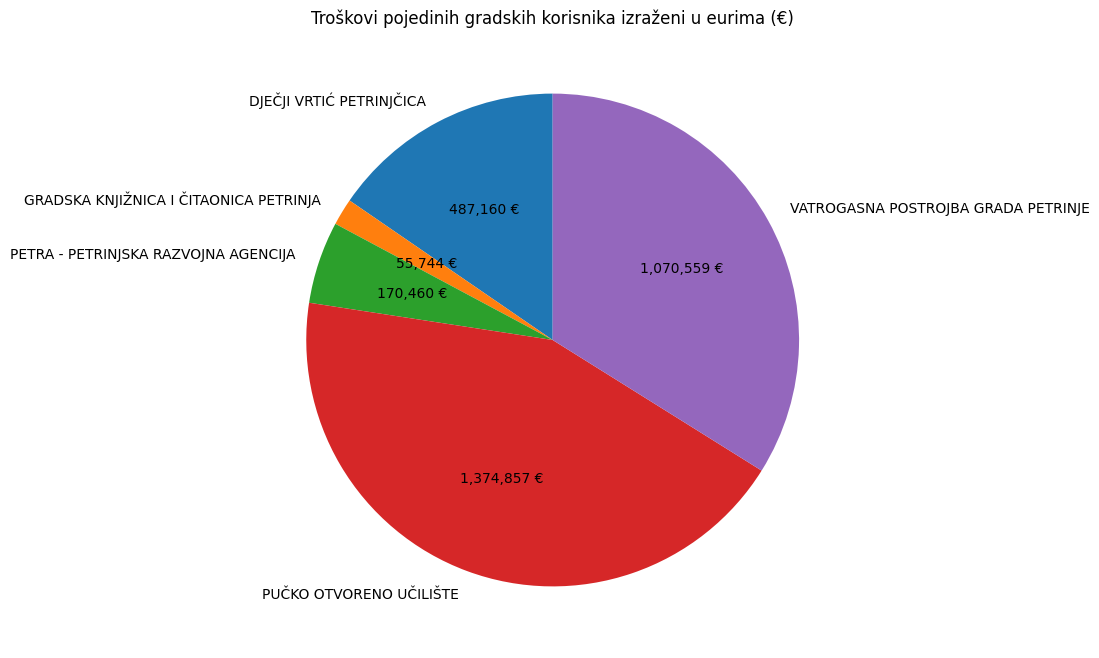

In [212]:
plt.figure(figsize=(10, 8))
plt.pie(korisnici, labels=korisnici.index, autopct=absolute_value, startangle=90)
plt.title("Troškovi pojedinih gradskih korisnika izraženi u eurima (€)")
plt.show()

### Troškovi grada prema teleoperaterima

In [213]:
teleoperateri_df = df[df['Primatelj'].isin(['HRVATSKI TELEKOM D.D.', 'A1 HRVATSKA D.O.O.', 'TELEMACH HRVATSKA D.O.O.'])]
iznosi = teleoperateri_df.groupby('Primatelj')['Iznos'].sum()
korisnici_teleusluga = teleoperateri_df.groupby('Proračunski Korisnik')['Iznos'].sum()

In [214]:
def absolute_value(val):
    a  = int(np.round(val/100.*iznosi.sum()))
    return '{:,.0f} €'.format(a)

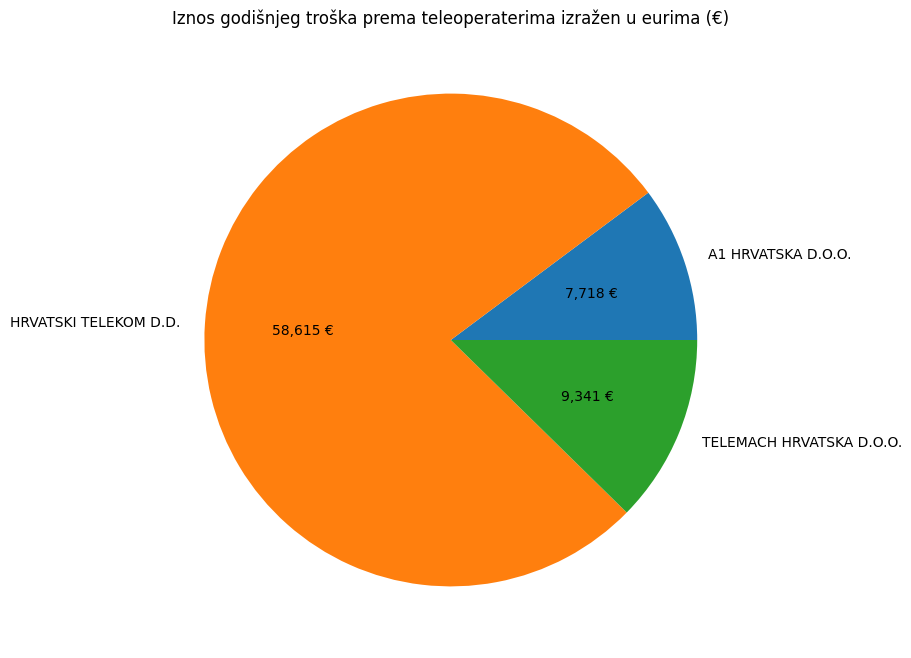

In [215]:
plt.figure(figsize=(10, 8))
plt.pie(iznosi, labels=iznosi.index,
        autopct=absolute_value)
plt.title('Iznos godišnjeg troška prema teleoperaterima izražen u eurima (€)')
plt.show()

In [216]:
def absolute_value(val):
    a  = int(np.round(val/100.*korisnici_teleusluga.sum()))
    return '{:,.0f} €'.format(a)

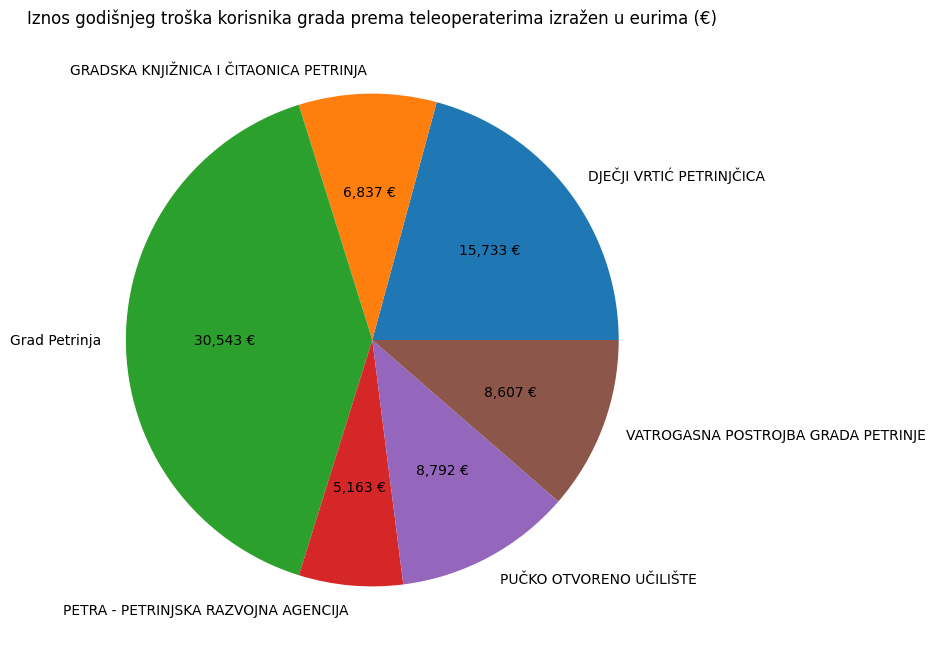

In [217]:
plt.figure(figsize=(10, 8))
plt.pie(korisnici_teleusluga, labels=korisnici_teleusluga.index,
        autopct=absolute_value)
plt.title('Iznos godišnjeg troška korisnika grada prema teleoperaterima izražen u eurima (€)')
plt.show()

# Postavljene hipoteze o setu podataka

## Trošak električne energije ovisi o srednjoj mjesečnoj temperaturi

### Učitavanje podataka s temperaturom 2018 - 2023

In [218]:
temp_df = pd.read_csv('temperature.csv', skiprows=2)
temp_df = temp_df.iloc[:, :2]
temp_df = temp_df.rename(columns={'time': 'Datum', 'temperature_2m (°C)': 'Temperatura'})

temp_df

,Datum,Temperatura
0,2018-01-01T00:00,8.3
1,2018-01-01T01:00,8.7
2,2018-01-01T02:00,8.9
3,2018-01-01T03:00,9.7
4,2018-01-01T04:00,9.8
...,...,...
52579,2023-12-31T19:00,11.1
52580,2023-12-31T20:00,11.2
52581,2023-12-31T21:00,10.8
52582,2023-12-31T22:00,11.0


Provjera podataka.

Dostupni vremenski niz: 2018-01-01 00:00:00 do 2023-12-31 23:00:00


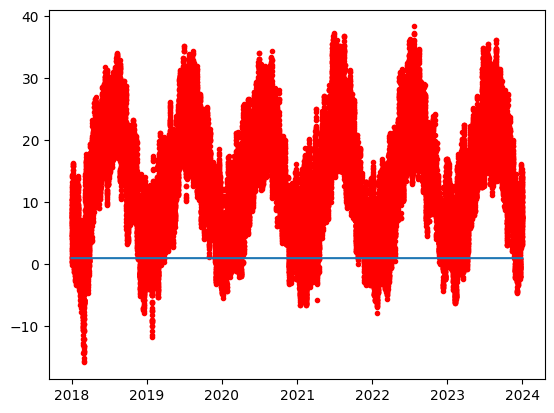

In [219]:
temp_df['Datum'] = pd.to_datetime(temp_df.iloc[:, 0])
temp_df['Mjesec'] = temp_df['Datum'].dt.month
temp_df['Year'] = temp_df['Datum'].dt.year
temp_df = temp_df.set_index('Datum')
temp_df.sort_index()
print(f'Dostupni vremenski niz: {temp_df.index[0]} do {temp_df.index[-1]}')

ts = pd.Series(temp_df['Temperatura'])
plt.plot(ts, 'r.')

DT = (ts.index[1:] - ts.index[:-1]).total_seconds() / 60 / 60 
plt.plot(ts.index[:-1], DT)

In [220]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2023-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperatura  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [221]:
print(f'Dostupni vremenski niz: {temp.index[0]} do {temp.index[-1]}')

Dostupni vremenski niz: 2023-01-01 00:00:00 do 2023-12-31 23:00:00


In [222]:
monthly_avg_temperatures = temp_df.groupby('Mjesec')['Temperatura'].mean().reset_index()

print(monthly_avg_temperatures)

    Mjesec  Temperatura
0        1     2.936559
1        2     4.572362
2        3     7.065457
3        4    11.510486
4        5    15.777352
5        6    21.373819
6        7    22.798970
7        8    22.445789
8        9    17.934954
9       10    13.551635
10      11     7.927500
11      12     4.242428


Text(0.5, 1.0, 'Mjesečna prosječna temperatura grada Petrinje')

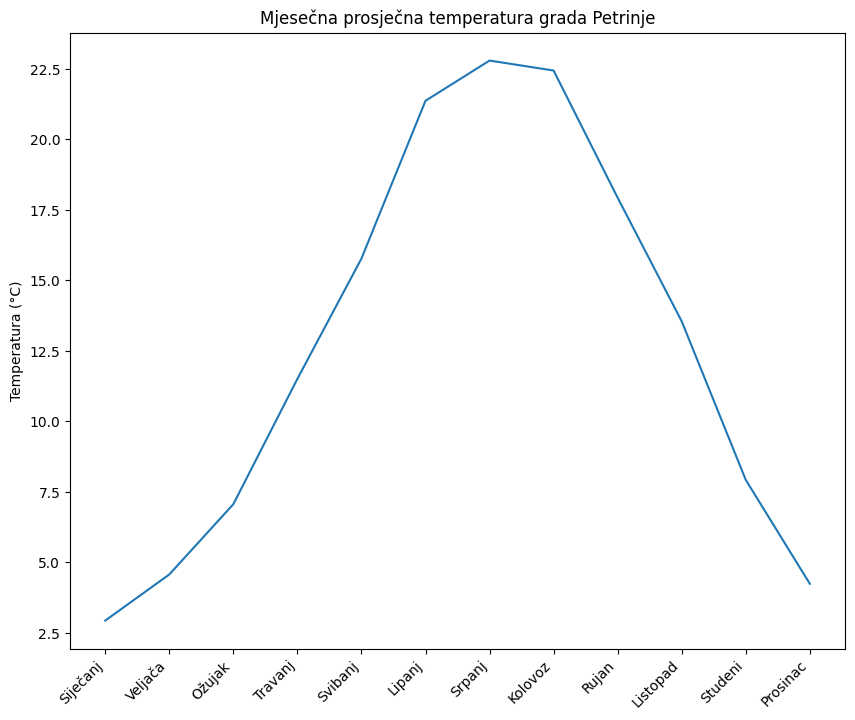

In [223]:
mjeseci = ['Siječanj', 'Veljača', 'Ožujak', 'Travanj', 'Svibanj', 'Lipanj', 'Srpanj', 'Kolovoz', 'Rujan','Listopad', 'Studeni', 'Prosinac']
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(mjeseci, monthly_avg_temperatures['Temperatura'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Temperatura (°C)')
plt.title('Mjesečna prosječna temperatura grada Petrinje')

In [224]:
monthly_avg_temperatures['Temperatura'].max()

22.79896953405018

In [225]:
monthly_avg_temperatures['Abs_Temperature'] = abs(monthly_avg_temperatures['Temperatura'] - monthly_avg_temperatures['Temperatura'].max())

In [226]:
monthly_avg_temperatures['Troskovi'] = troskovi.reset_index(drop=True)

In [227]:
monthly_avg_temperatures

,Mjesec,Temperatura,Abs_Temperature,Troskovi
0,1,2.936559,19.862410,4321.09
1,2,4.572362,18.226608,23709.92
2,3,7.065457,15.733513,8220.52
3,4,11.510486,11.288483,3670.82
4,5,15.777352,7.021617,4953.23
5,6,21.373819,1.425150,5223.36
6,7,22.798970,0.000000,1800.85
7,8,22.445789,0.353181,333.62
8,9,17.934954,4.864016,5062.57
9,10,13.551635,9.247334,544.03


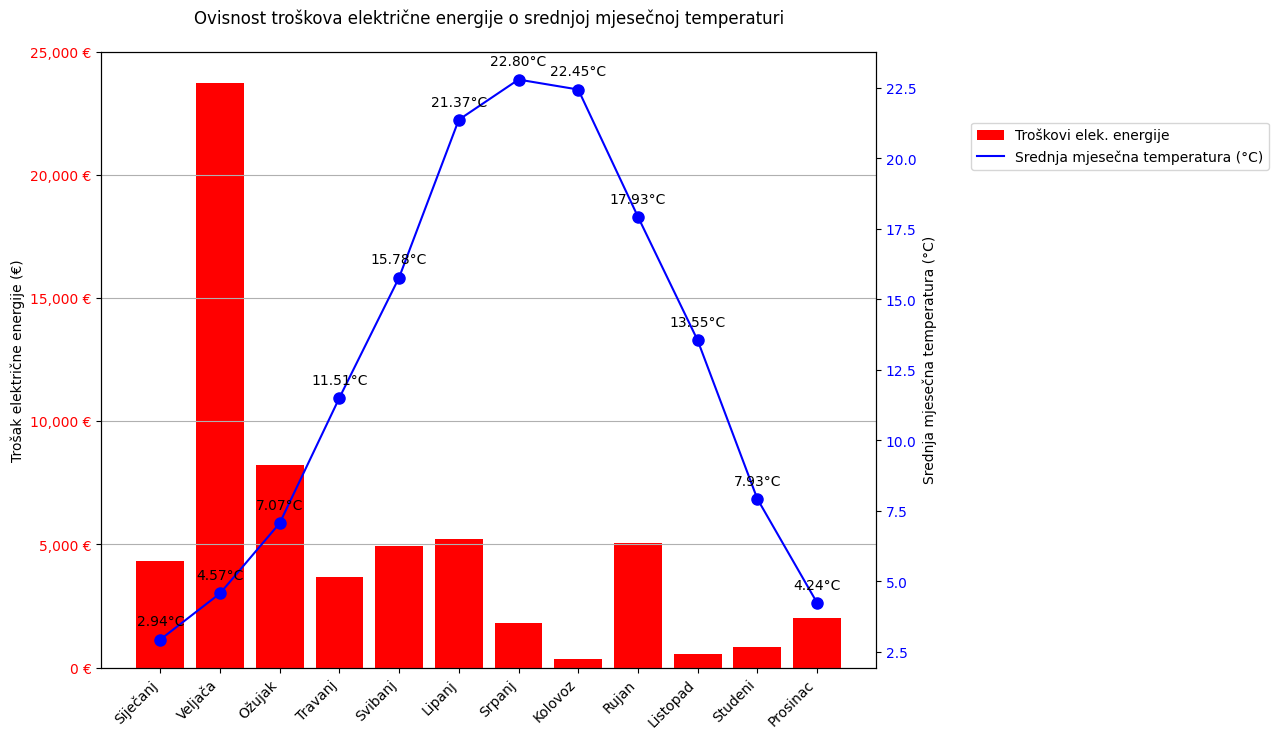

In [228]:
fig, ax1 = plt.subplots(figsize=(10,8))

ax1.bar(mjeseci, troskovi, color='red', label='Troškovi elek. energije')
ax1.set_ylabel('Trošak električne energije (€)')
current_values = ax1.get_yticks()
ax1.set_yticks(current_values)
ax1.set_yticklabels(['{:,.0f} €'.format(x) for x in current_values])
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True, axis='y')
ax1.set_xticks(mjeseci)
ax1.set_xticklabels(rotation=45, ha='right', labels=mjeseci)

ax2 = ax1.twinx()
ax2.plot(mjeseci, monthly_avg_temperatures['Temperatura'], color='blue', label='Srednja mjesečna temperatura (°C)')
ax2.set_ylabel('Srednja mjesečna temperatura (°C)')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Ovisnost troškova električne energije o srednjoj mjesečnoj temperaturi', pad=20)
fig.legend(loc='upper right', bbox_to_anchor=(1.3, 0.8))

for x,y in zip(mjeseci, monthly_avg_temperatures['Temperatura']):

    label = "{:.2f}°C".format(y)

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center') 
    plt.plot(x, y, marker='o', color='blue', markersize=8) 

plt.show()

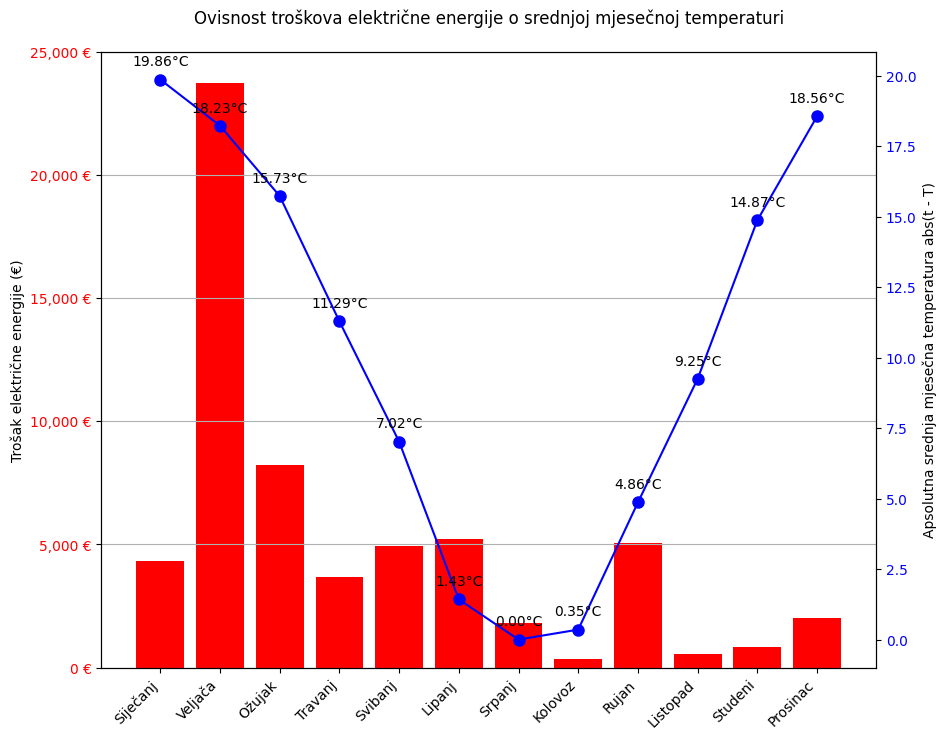

In [229]:
fig, ax1 = plt.subplots(figsize=(10,8))

ax1.bar(mjeseci, troskovi, color='red', label='Troškovi elek. energije')
ax1.set_ylabel('Trošak električne energije (€)')
current_values = ax1.get_yticks()
ax1.set_yticks(current_values)
ax1.set_yticklabels(['{:,.0f} €'.format(x) for x in current_values])
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True, axis='y')
ax1.set_xticks(mjeseci)
ax1.set_xticklabels(rotation=45, ha='right', labels=mjeseci)

ax2 = ax1.twinx()
ax2.plot(mjeseci, monthly_avg_temperatures['Abs_Temperature'], color='blue', label='Apsolutna srednja mjesečna temperatura (°C)')
ax2.set_ylabel('Apsolutna srednja mjesečna temperatura abs(t - T)')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Ovisnost troškova električne energije o srednjoj mjesečnoj temperaturi', pad=20)


for x,y in zip(mjeseci, monthly_avg_temperatures['Abs_Temperature']):

    label = "{:.2f}°C".format(y)

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center') 
    plt.plot(x, y, marker='o', color='blue', markersize=8) 

plt.show()

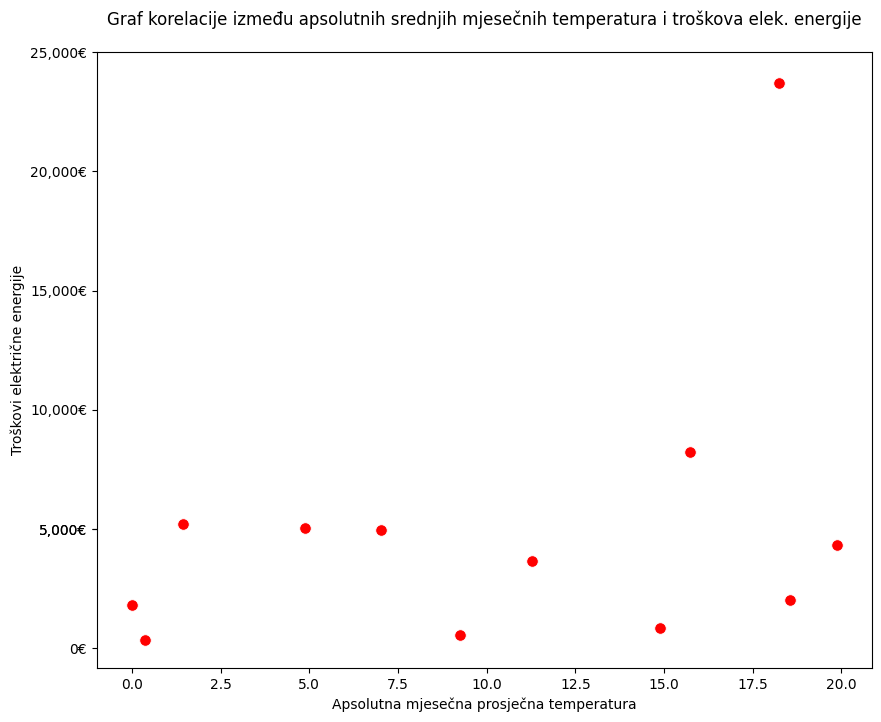

In [230]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Abs_Temperature', y='Troskovi', data=monthly_avg_temperatures, s=70, color='red')
plt.title('Graf korelacije između apsolutnih srednjih mjesečnih temperatura i troškova elek. energije', pad=20)
plt.xlabel('Apsolutna mjesečna prosječna temperatura')
plt.ylabel('Troškovi električne energije')
current_values = plt.gca().get_yticks()
plt.gca().set_yticks(abs(current_values))
plt.gca().set_yticklabels(['{:,.0f}€'.format(x) for x in current_values])
plt.show()

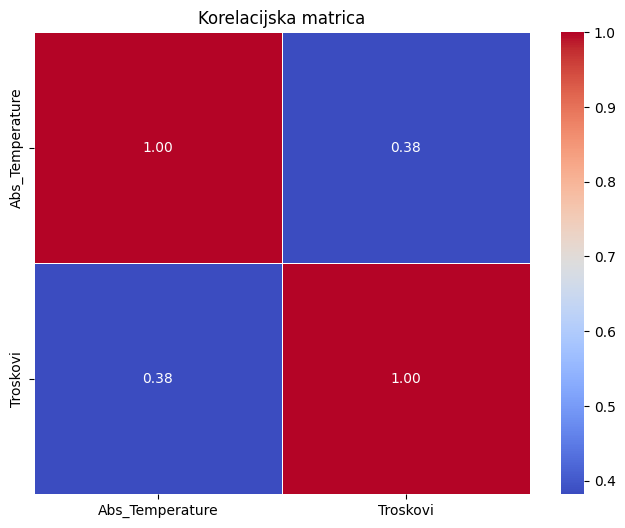

In [231]:
correlation_matrix = monthly_avg_temperatures[['Abs_Temperature', 'Troskovi']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Korelacijska matrica')
plt.show()

### Ovisnost troškova električne energije grada Petrinje o srednjoj mjesečnoj temperaturi

Podaci o mjesečnim troškovima električne energije grada Petrinje:

In [232]:
elek_df  = df[df['Primatelj'].isin(['HEP ELEKTRA D.O.O.'])]

In [233]:
elek_df

,Datum,Primatelj,OIB,Mjesto,Broj računa,Opis,Iznos,Datum računa,Datum dospijeća,IBAN,Proračunski Korisnik,Mjesec
25,2023-01-18,HEP ELEKTRA D.O.O.,43965974818,10000 Zagreb,2203400385,EL.ENERGIJA KONT.NASELJE PRNJAVOR ČUNTIĆKI 11-...,842.83,2022-11-30T00:00:00.000Z,2022-12-05T00:00:00.000Z,HR4323900011500128056,Grad Petrinja,1.0
26,2023-01-18,HEP ELEKTRA D.O.O.,43965974818,10000 Zagreb,2203400385-221020-2,EL.ENERGIJA KONT.NASELJE PRNJAVOR ČUNTIĆKI 05-...,166.88,2022-10-31T00:00:00.000Z,2022-11-11T00:00:00.000Z,HR4323900011500128056,Grad Petrinja,1.0
27,2023-01-19,HEP ELEKTRA D.O.O.,43965974818,10000 Zagreb,2300092009-220920-0,EL.ENERGIJA MO MALA GORICA 09-2022,11.44,2022-09-30T00:00:00.000Z,2022-10-31T00:00:00.000Z,HR4323900011500128056,Grad Petrinja,1.0
28,2023-01-19,HEP ELEKTRA D.O.O.,43965974818,10000 Zagreb,2301067493-221021-0,EL.ENERGIJA MO KRIŽ- CEPELIŠ 10-2022,11.44,2022-11-29T00:00:00.000Z,2022-12-29T00:00:00.000Z,HR4323900011500128056,Grad Petrinja,1.0
29,2023-01-19,HEP ELEKTRA D.O.O.,43965974818,10000 Zagreb,2300092009-221021-7,EL.ENERGIJA MOMALA GORICA 10-2022,11.47,2022-11-29T00:00:00.000Z,2022-12-15T00:00:00.000Z,HR4323900011500128056,Grad Petrinja,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4018,2023-11-24,HEP ELEKTRA D.O.O.,43965974818,10000 Zagreb,2300055182-230920-5,EL. EN. ZA 09/2023. (MULTIFUNKCIONALNO),75.94,2023-09-30T00:00:00.000Z,2023-10-24T00:00:00.000Z,HR4323900011500128056,Grad Petrinja,11.0
4039,2023-11-24,HEP ELEKTRA D.O.O.,43965974818,10000 Zagreb,2300055182-230820-9,EL. EN. ZA 08/2023. (MULTIFUNKCIONALNO),67.37,2023-08-31T00:00:00.000Z,2023-09-27T00:00:00.000Z,HR4323900011500128056,Grad Petrinja,11.0
4744,2023-12-22,HEP ELEKTRA D.O.O.,43965974818,10000 Zagreb,2300121604-231120-6,Električna energija 11/ 23,1235.86,2023-11-30T00:00:00.000Z,2023-12-23T00:00:00.000Z,HR4323900011500128056,PUČKO OTVORENO UČILIŠTE,12.0
4758,2023-12-22,HEP ELEKTRA D.O.O.,43965974818,10000 Zagreb,2300086255-231120-0,Električna energija 11/ 23,216.44,2023-11-30T00:00:00.000Z,2023-12-23T00:00:00.000Z,HR4323900011500128056,PUČKO OTVORENO UČILIŠTE,12.0


In [234]:
troskovi = elek_df.groupby('Mjesec')['Iznos'].sum()
troskovi

Mjesec
1.0      4321.09
2.0     23709.92
3.0      8220.52
4.0      3670.82
5.0      4953.23
6.0      5223.36
7.0      1800.85
8.0       333.62
9.0      5062.57
10.0      544.03
11.0      833.58
12.0     2005.83
Name: Iznos, dtype: float64

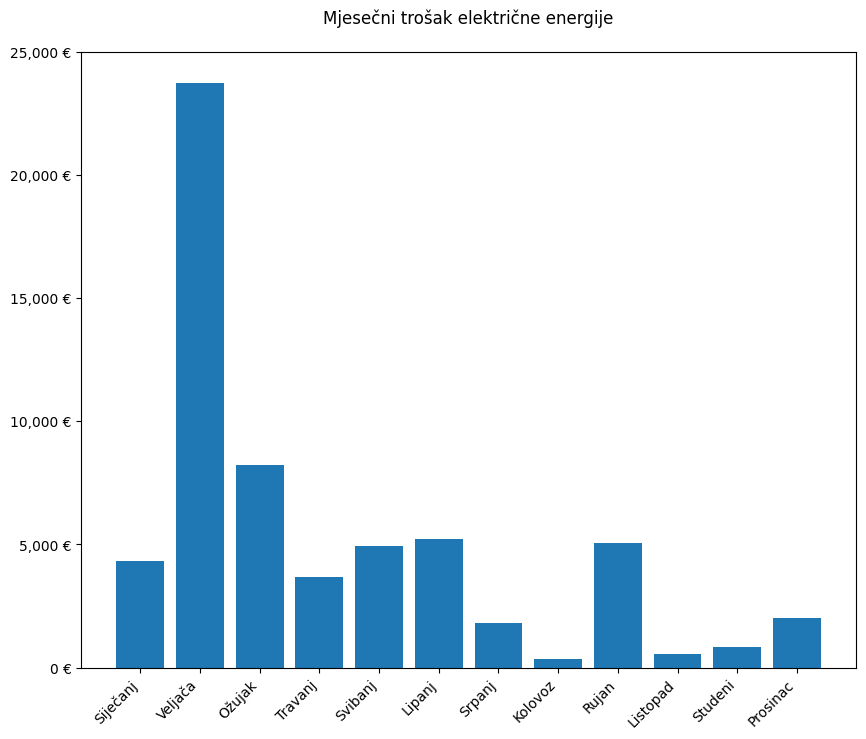

In [235]:
fig, ax = plt.subplots(figsize=(10, 8));
ax.bar(mjeseci, troskovi)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(rotation=45, ha='right', labels=mjeseci)
ax.set_title('Mjesečni trošak električne energije', pad=20)
current_values = ax.get_yticks()
ax.set_yticks(current_values)
ax.set_yticklabels(['{:,.0f} €'.format(x) for x in current_values])
plt.show()

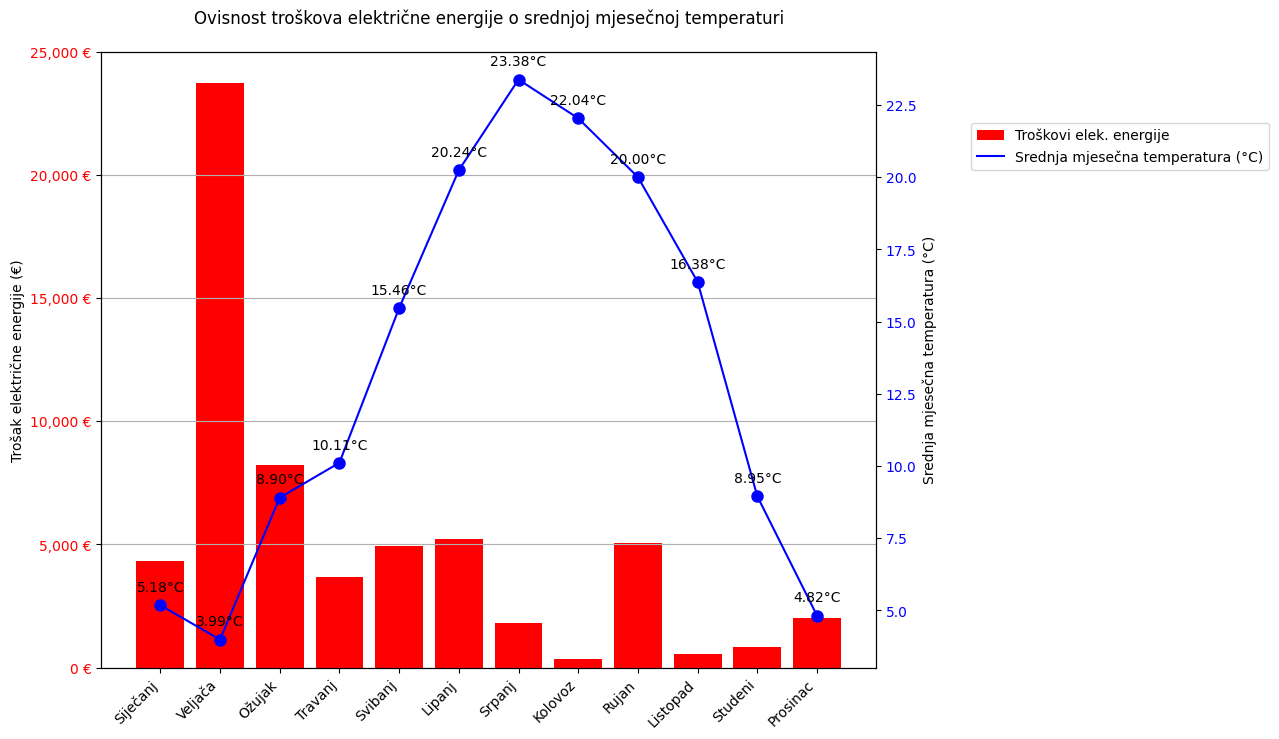

In [236]:
fig, ax1 = plt.subplots(figsize=(10,8))

ax1.bar(mjeseci, troskovi, color='red', label='Troškovi elek. energije')
ax1.set_ylabel('Trošak električne energije (€)')
current_values = ax1.get_yticks()
ax1.set_yticks(current_values)
ax1.set_yticklabels(['{:,.0f} €'.format(x) for x in current_values])
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True, axis='y')
ax1.set_xticks(mjeseci)
ax1.set_xticklabels(rotation=45, ha='right', labels=mjeseci)

ax2 = ax1.twinx()
ax2.plot(mjeseci, monthly_mean, color='blue', label='Srednja mjesečna temperatura (°C)')
ax2.set_ylabel('Srednja mjesečna temperatura (°C)')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Ovisnost troškova električne energije o srednjoj mjesečnoj temperaturi', pad=20)
fig.legend(loc='upper right', bbox_to_anchor=(1.3, 0.8))

for x,y in zip(mjeseci, monthly_mean):

    label = "{:.2f}°C".format(y)

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center') 
    plt.plot(x, y, marker='o', color='blue', markersize=8) 

plt.show()

Iz prikazanog grafa možemo zaključiti da je trošak električne energije obrnuto proporcionalan srednjoj mjesečnoj temperaturi. Vidimo visoki trošak u mjesecu veljači i ožujku koji ovise o prosječnoj temperaturi u mjesecu siječnju i veljači, dok su najniži troškovi vidljivi u ljetnim mjesecima kada su prosječne temperature najviše. 

# Trošak goriva ovisi o mjesečnoj cijeni nafte na svjetskom tržištu

Učitavanje podataka o cijenama nafte po barelu na svjetskom tržištu. 

In [237]:
nafta_db = pd.read_csv('cijene_nafte.csv', skiprows=4)
nafta_db = nafta_db.rename(columns={'Day': 'Datum', 'Europe Brent Spot Price FOB  Dollars per Barrel': 'Cijena po barelu (USD)'})
nafta_db

,Datum,Cijena po barelu (USD)
0,02/12/2024,83.88
1,02/9/2024,83.58
2,02/8/2024,83.01
3,02/7/2024,81.18
4,02/6/2024,80.46
...,...,...
9317,05/26/1987,18.63
9318,05/25/1987,18.60
9319,05/22/1987,18.55
9320,05/21/1987,18.45


In [238]:
nafta_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9322 entries, 0 to 9321
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datum                   9322 non-null   object 
 1   Cijena po barelu (USD)  9322 non-null   float64
dtypes: float64(1), object(1)
memory usage: 145.8+ KB


### Sortiranje podataka po datumu i 2023. godini. Popunjavanje nedostajućih podataka interpolacijom.

In [239]:
nafta_db['Datum'] = pd.to_datetime(nafta_db['Datum'])
nafta_db = nafta_db[nafta_db['Datum'].dt.year == 2023]

In [240]:
nafta_db = nafta_db.set_index('Datum')

In [241]:
nafta_db.sort_index()

,Cijena po barelu (USD)
Datum,
2023-01-01,82.82
2023-01-03,80.36
2023-01-04,75.31
2023-01-05,76.73
2023-01-06,76.41
...,...
2023-12-22,80.23
2023-12-27,80.97
2023-12-28,79.04


In [242]:
ts = pd.Series(nafta_db['Cijena po barelu (USD)'])

In [243]:
IT = pd.date_range(start='1/1/2023', end='12/31/2023', freq='1D')

In [244]:
ts = ts.reindex(IT, fill_value=np.nan)

In [245]:
ts = ts.interpolate()

In [246]:
ts

2023-01-01    82.82
2023-01-02    81.59
2023-01-03    80.36
2023-01-04    75.31
2023-01-05    76.73
              ...  
2023-12-27    80.97
2023-12-28    79.04
2023-12-29    77.69
2023-12-30    77.45
2023-12-31    77.21
Freq: D, Name: Cijena po barelu (USD), Length: 365, dtype: float64

In [247]:
ts.shape

(365,)

Text(0, 0.5, 'Cijena nafte po barelu')

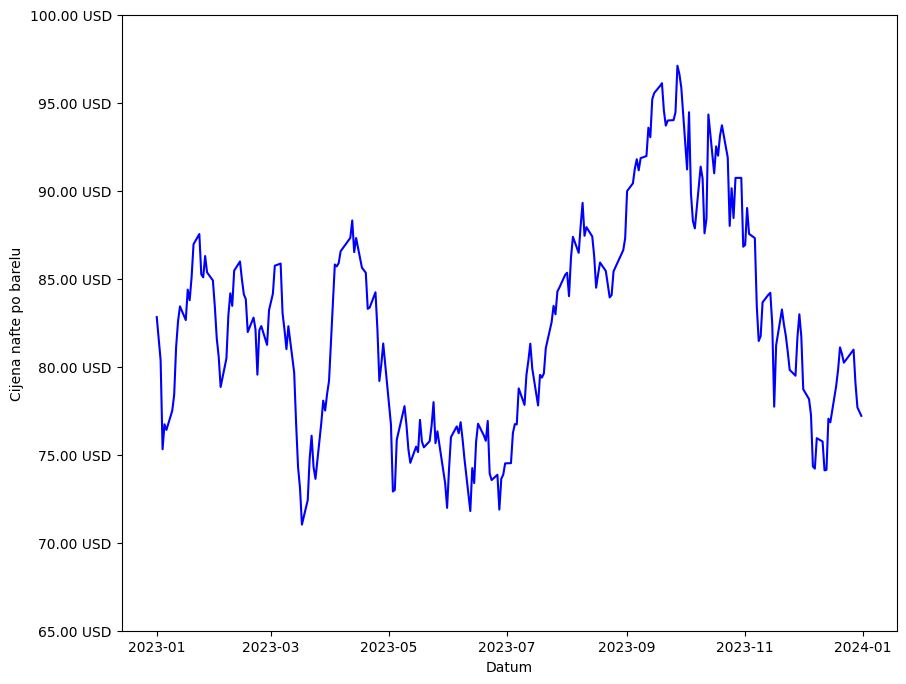

In [248]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(ts, 'b-')
current_values = plt.gca().get_yticks()
plt.gca().set_yticks(current_values)
plt.gca().set_yticklabels(['{:,.2f} USD'.format(x) for x in current_values])
plt.xlabel('Datum')
plt.ylabel('Cijena nafte po barelu')

### Izračunavanje srednje mjesečne cijene nafte

In [249]:
nafta_mjeseci = nafta_db['Cijena po barelu (USD)'].resample('M').mean()

print(nafta_mjeseci)

Datum
2023-01-31    82.515909
2023-02-28    82.585000
2023-03-31    78.434348
2023-04-30    84.638333
2023-05-31    75.466000
2023-06-30    74.839091
2023-07-31    80.108095
2023-08-31    86.147727
2023-09-30    93.722381
2023-10-31    90.595909
2023-11-30    82.940000
2023-12-31    77.610000
Freq: M, Name: Cijena po barelu (USD), dtype: float64


Text(0.5, 1.0, 'Cijena nafte po barelu po mjesecima u 2023. godini')

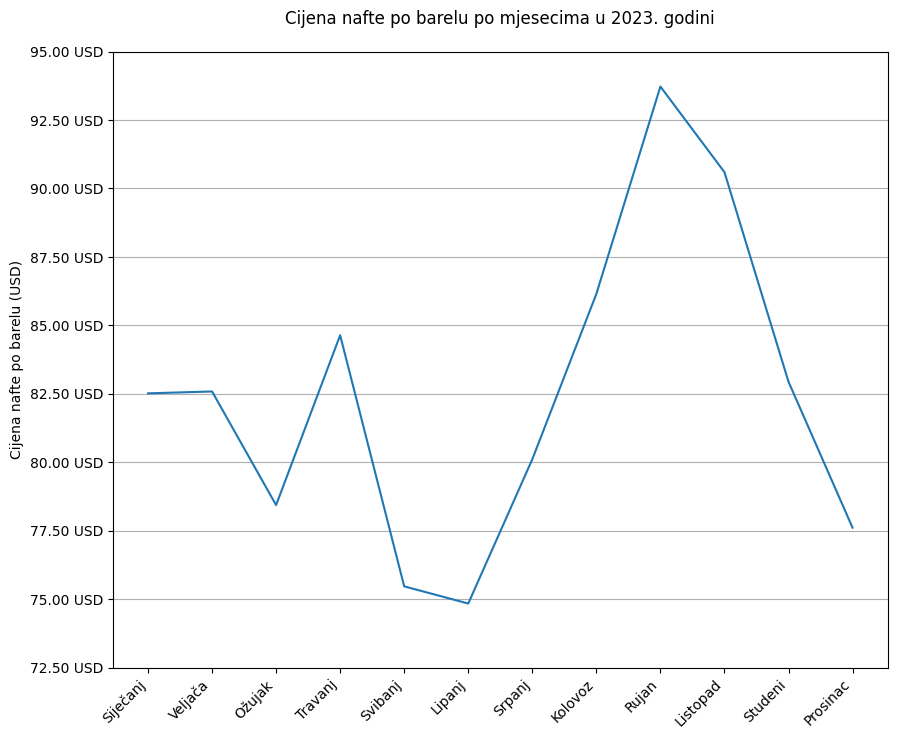

In [250]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(mjeseci, nafta_mjeseci)
plt.xticks(rotation=45, ha='right')
current_values = plt.gca().get_yticks()
plt.gca().set_yticks(current_values)
plt.gca().set_yticklabels(['{:,.2f} USD'.format(x) for x in current_values])
plt.grid(True, axis='y')
plt.ylabel('Cijena nafte po barelu (USD)')
plt.title('Cijena nafte po barelu po mjesecima u 2023. godini', pad=20)

### Izračun troškova goriva grada Petrinje po mjesecima

In [251]:
gorivo_df = df[df['Primatelj'].isin(['INA-INDUSTRIJA NAFTE D.D.'])]

In [252]:
gorivo = gorivo_df.groupby('Mjesec')['Iznos'].sum()

In [253]:
gorivo

Mjesec
1.0     1207.31
2.0     2888.40
3.0     3002.71
4.0     1827.39
5.0     2159.13
6.0     5709.23
7.0     1450.53
8.0     2714.16
9.0     2856.21
10.0    2568.24
11.0    2749.67
12.0    2316.35
Name: Iznos, dtype: float64

Text(0.5, 1.0, 'Mjesečni trošak goriva grada Petrinje 2023. godine')

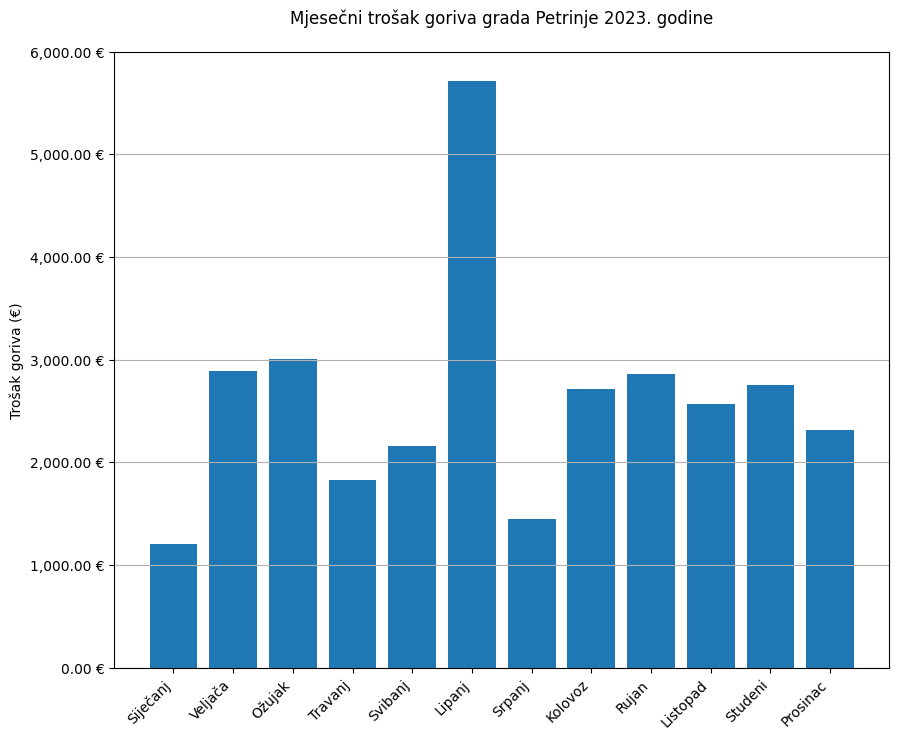

In [254]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.bar(mjeseci, gorivo)
plt.xticks(rotation=45, ha='right')
current_values = plt.gca().get_yticks()
plt.gca().set_yticks(current_values)
plt.gca().set_yticklabels(['{:,.2f} €'.format(x) for x in current_values])
plt.grid(True, axis='y')
plt.ylabel('Trošak goriva (€)')
plt.title('Mjesečni trošak goriva grada Petrinje 2023. godine', pad=20)

In [255]:
gorivo1 = gorivo.shift(3)

In [256]:
gorivo1 = gorivo1.dropna().values

In [257]:
gorivo1

array([1207.31, 2888.4 , 3002.71, 1827.39, 2159.13, 5709.23, 1450.53,
       2714.16, 2856.21])

In [258]:
nafta_mjeseci = nafta_mjeseci.values[3:]

In [259]:
nafta_mjeseci

array([84.63833333, 75.466     , 74.83909091, 80.10809524, 86.14772727,
       93.72238095, 90.59590909, 82.94      , 77.61      ])

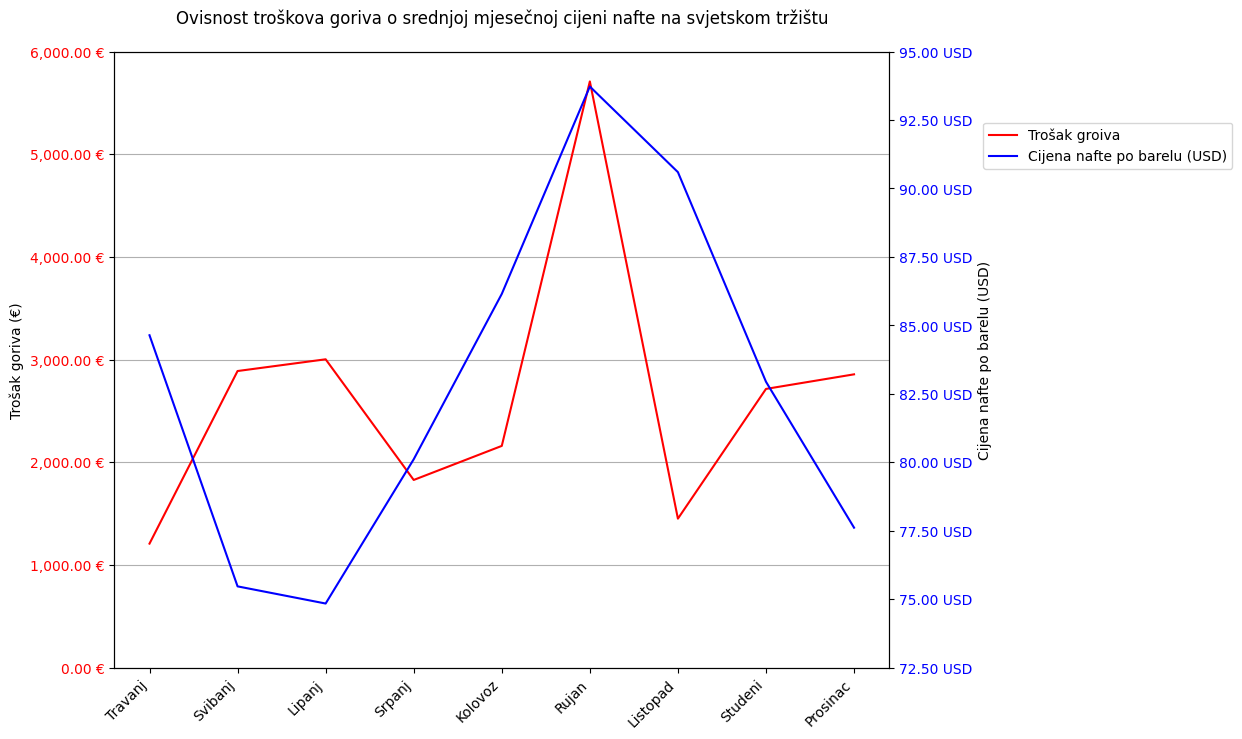

In [260]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.plot(mjeseci[3:], gorivo1, color='red', label='Trošak groiva')
ax1.set_ylabel('Trošak goriva (€)')
ax1.tick_params(axis='y', labelcolor='red')
current_values = ax1.get_yticks()
ax1.set_yticks(current_values)
ax1.set_yticklabels(['{:,.2f} €'.format(x) for x in current_values])
ax1.grid(True, axis='y')
ax1.set_xticks(mjeseci)
ax1.set_xticklabels(rotation=45, ha='right', labels=mjeseci)

ax2 = ax1.twinx()
ax2.plot(mjeseci[3:], nafta_mjeseci, color='blue', label='Cijena nafte po barelu (USD)')
current_values = ax2.get_yticks()
ax2.set_yticks(current_values)
ax2.set_yticklabels(['{:,.2f} USD'.format(x) for x in current_values])
ax2.set_ylabel('Cijena nafte po barelu (USD)')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Ovisnost troškova goriva o srednjoj mjesečnoj cijeni nafte na svjetskom tržištu', pad=20)
fig.legend(loc='upper right', bbox_to_anchor=(1.25, 0.8))

plt.show()


In [261]:
df_corr = pd.DataFrame()
df_corr['Mjesec'] = range(4, 13)
df_corr['Gorivo'] = gorivo1
df_corr['Nafta'] = nafta_mjeseci

In [262]:
df_corr.at[0, 'Gorivo'] = 1100.45
df_corr.at[1, 'Gorivo'] = 1120.67
df_corr.at[2, 'Gorivo'] = 1064.34

In [263]:
df_corr

,Mjesec,Gorivo,Nafta
0,4,1100.45,84.638333
1,5,1120.67,75.466000
2,6,1064.34,74.839091
3,7,1827.39,80.108095
4,8,2159.13,86.147727
5,9,5709.23,93.722381
6,10,1450.53,90.595909
7,11,2714.16,82.940000
8,12,2856.21,77.610000


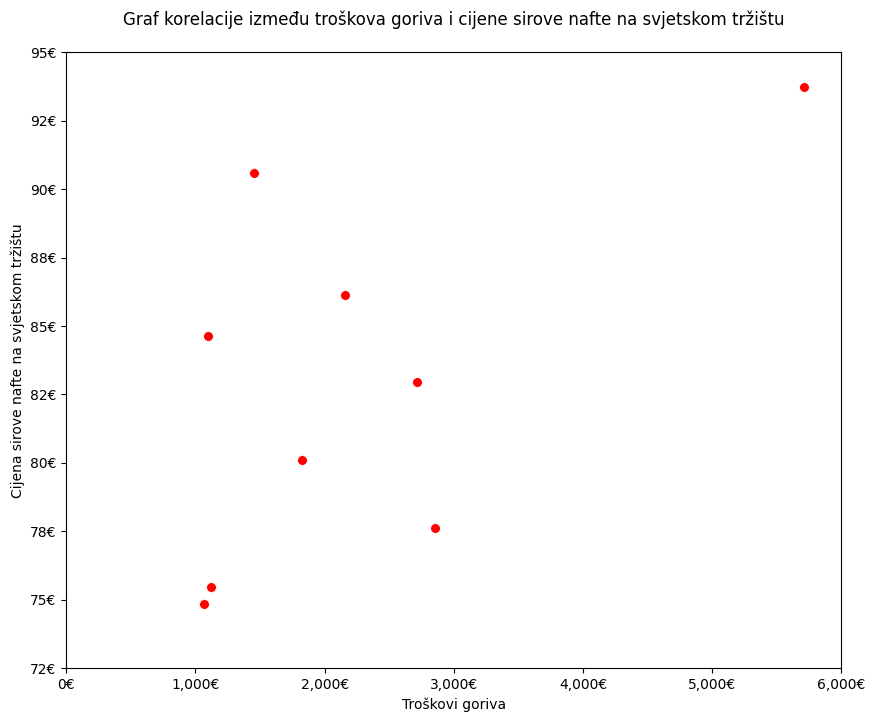

In [264]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Gorivo', y='Nafta', data=df_corr, s=50, color='red')
plt.title('Graf korelacije između troškova goriva i cijene sirove nafte na svjetskom tržištu', pad=20)
plt.xlabel('Troškovi goriva')
plt.ylabel('Cijena sirove nafte na svjetskom tržištu')
current_values = plt.gca().get_yticks()
plt.gca().set_yticks(abs(current_values))
plt.gca().set_yticklabels(['{:,.0f}€'.format(x) for x in current_values])
current_values = plt.gca().get_xticks()
plt.gca().set_xticks(abs(current_values))
plt.gca().set_xticklabels(['{:,.0f}€'.format(x) for x in current_values])
plt.show()

In [265]:
correlation_matrix = df_corr[['Gorivo', 'Nafta']].corr()

In [266]:
correlation_matrix

,Gorivo,Nafta
Gorivo,1.000000,0.579651
Nafta,0.579651,1.000000


# Troškovi nabave hrane za vrtić ovise o godišnjoj i mjesečnoj stopi inflacije 2023. godine

Učitavanje podataka o mjesečnoj i godišnjoj stopi inflacije po mjesecima u 2023. godini.

In [267]:
inflacija_db = pd.read_csv('inflacija.csv')

In [268]:
inflacija_db = inflacija_db[inflacija_db['category'].str.contains('2023')]

In [269]:
inflacija_db

,category,Godišnja stopa inflacije %,Mjesečna stopa inflacije %
24,I. 2023,12.7,0.0
25,II. 2023,12.0,0.2
26,III. 2023,10.7,0.9
27,IV. 2023,8.9,1.0
28,V. 2023,7.9,0.5
29,VI. 2023,7.6,0.9
30,VII. 2023,7.3,0.2
31,VIII. 2023,7.8,0.5
32,IX. 2023,6.7,0.5
33,X. 2023,5.8,0.5


In [270]:
godisnja_inflacija = inflacija_db[['category', 'Godišnja stopa inflacije %']]

In [271]:
mjeseci = ['Siječanj', 'Veljača', 'Ožujak', 'Travanj', 'Svibanj', 'Lipanj', 'Srpanj', 'Kolovoz', 'Rujan','Listopad', 'Studeni', 'Prosinac']

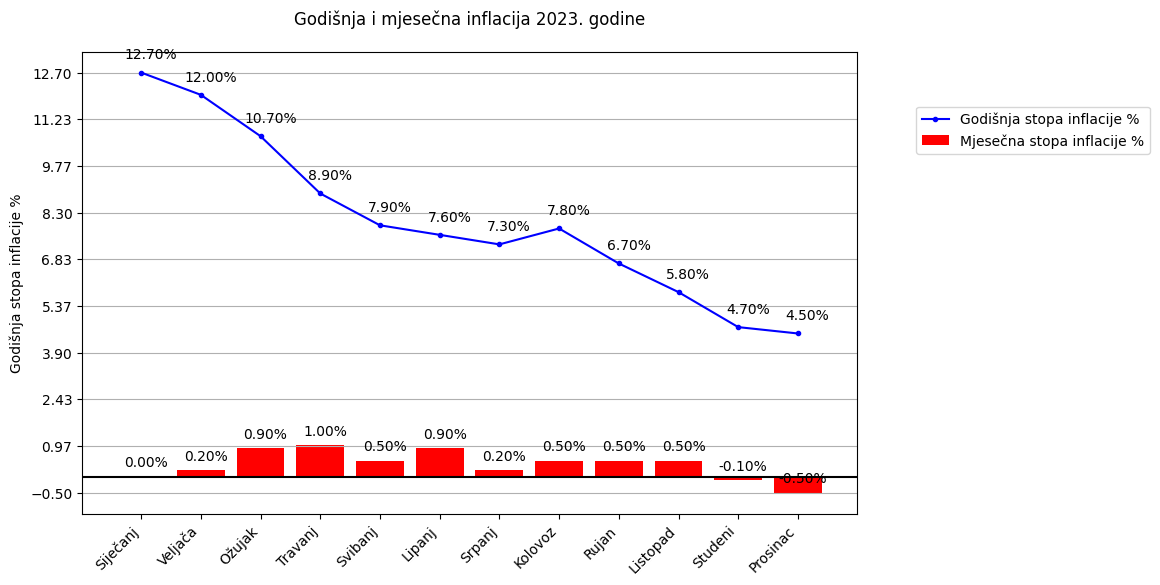

In [272]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(mjeseci, inflacija_db['Mjesečna stopa inflacije %'], color='red', label='Mjesečna stopa inflacije %')
ax1.set_yticks(np.linspace(np.min(inflacija_db['Mjesečna stopa inflacije %']), np.max(inflacija_db['Godišnja stopa inflacije %']), 10))
ax1.set_ylabel('Godišnja stopa inflacije %')
ax1.set_xticks(mjeseci)
ax1.set_xticklabels(rotation=45, ha='right', labels=mjeseci)
ax1.grid(True, axis='y')
ax1.axhline(c='k')
for x,y in zip(mjeseci,inflacija_db['Mjesečna stopa inflacije %']):

    label = "{:.2f}%".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset pixels", 
                 xytext=(5,10), 
                 ha='center') 

ax1.plot(mjeseci, inflacija_db['Godišnja stopa inflacije %'], color='blue', label='Godišnja stopa inflacije %', ls='-', marker='.')
for x,y in zip(mjeseci,inflacija_db['Godišnja stopa inflacije %']):

    label = "{:.2f}%".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(7,10), 
                 ha='center') 

plt.title('Godišnja i mjesečna inflacija 2023. godine', pad=20)
fig.legend(loc='upper right', bbox_to_anchor=(1.2, 0.8))

plt.show()

### Izračun mjesečnih troškova za namirnice dječjeg vrtića

In [273]:
namirnice_db = df[(df['Proračunski Korisnik'] == 'DJEČJI VRTIĆ PETRINJČICA') & (df['Opis'].str.contains('namirnice', case=False))]

In [274]:
namirnice_db

,Datum,Primatelj,OIB,Mjesto,Broj računa,Opis,Iznos,Datum računa,Datum dospijeća,IBAN,Proračunski Korisnik,Mjesec
1466,2023-05-29,MLIN I PEKARE D.O.O.,22260862756,44000 Sisak,1023/1/1,Namirnice,427.48,2023-02-02T00:00:00.000Z,2023-03-04T00:00:00.000Z,HR1223600001101330394,DJEČJI VRTIĆ PETRINJČICA,5.0
1474,2023-05-29,MLIN I PEKARE D.O.O.,22260862756,44000 Sisak,285/1/1,Namirnice,328.62,2023-01-19T00:00:00.000Z,2023-02-18T00:00:00.000Z,HR1223600001101330394,DJEČJI VRTIĆ PETRINJČICA,5.0
1475,2023-05-29,MLIN I PEKARE D.O.O.,22260862756,44000 Sisak,632/1/1,Namirnice,153.48,2023-01-26T00:00:00.000Z,2023-02-25T00:00:00.000Z,HR1223600001101330394,DJEČJI VRTIĆ PETRINJČICA,5.0
1476,2023-05-29,VINDIJA D.D.,44138062462,42000 Varaždin,167165/550/3,Namirnice,76.27,2023-02-25T00:00:00.000Z,2023-03-27T00:00:00.000Z,HR0623600001101741782,DJEČJI VRTIĆ PETRINJČICA,5.0
1492,2023-05-29,MLIN I PEKARE D.O.O.,22260862756,44000 Sisak,2257/1/1,Namirnice,423.47,2023-02-21T00:00:00.000Z,2023-03-23T00:00:00.000Z,HR1223600001101330394,DJEČJI VRTIĆ PETRINJČICA,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5218,2023-12-29,MLIN I PEKARE D.O.O.,22260862756,44000 Sisak,14357/1/1,Vrtić namirnice,326.94,2023-10-13T00:00:00.000Z,2023-11-12T00:00:00.000Z,HR1223600001101330394,DJEČJI VRTIĆ PETRINJČICA,12.0
5222,2023-12-29,MLIN I PEKARE D.O.O.,22260862756,44000 Sisak,13199/1/1,"Vrtić namirnice,kruh i pekarski proizvodi",416.64,2023-09-20T00:00:00.000Z,2023-10-20T00:00:00.000Z,HR1223600001101330394,DJEČJI VRTIĆ PETRINJČICA,12.0
5224,2023-12-29,MLIN I PEKARE D.O.O.,22260862756,44000 Sisak,11847/1/1,Vrtić namirnice,133.50,2023-09-01T00:00:00.000Z,2023-10-01T00:00:00.000Z,HR1223600001101330394,DJEČJI VRTIĆ PETRINJČICA,12.0
5227,2023-12-29,MLIN I PEKARE D.O.O.,22260862756,44000 Sisak,15618/1/1,"Vrtić namirnice,kruh i pekarski proizvodi",494.34,2023-10-31T00:00:00.000Z,2023-11-30T00:00:00.000Z,HR1223600001101330394,DJEČJI VRTIĆ PETRINJČICA,12.0


### Prikaz godišnjeg troška prema dobavljačima namirnica za vrtić

In [275]:
troškovi_namirnica_dobavljači = namirnice_db.groupby('Primatelj')['Iznos'].sum()

In [276]:
troškovi_namirnica_dobavljači = troškovi_namirnica_dobavljači[troškovi_namirnica_dobavljači > 100]
troškovi_namirnica_dobavljači = troškovi_namirnica_dobavljači.sort_values(ascending=True)

Text(0.5, 1.0, 'Trošak prema dobavljačima namirnica za vrtić')

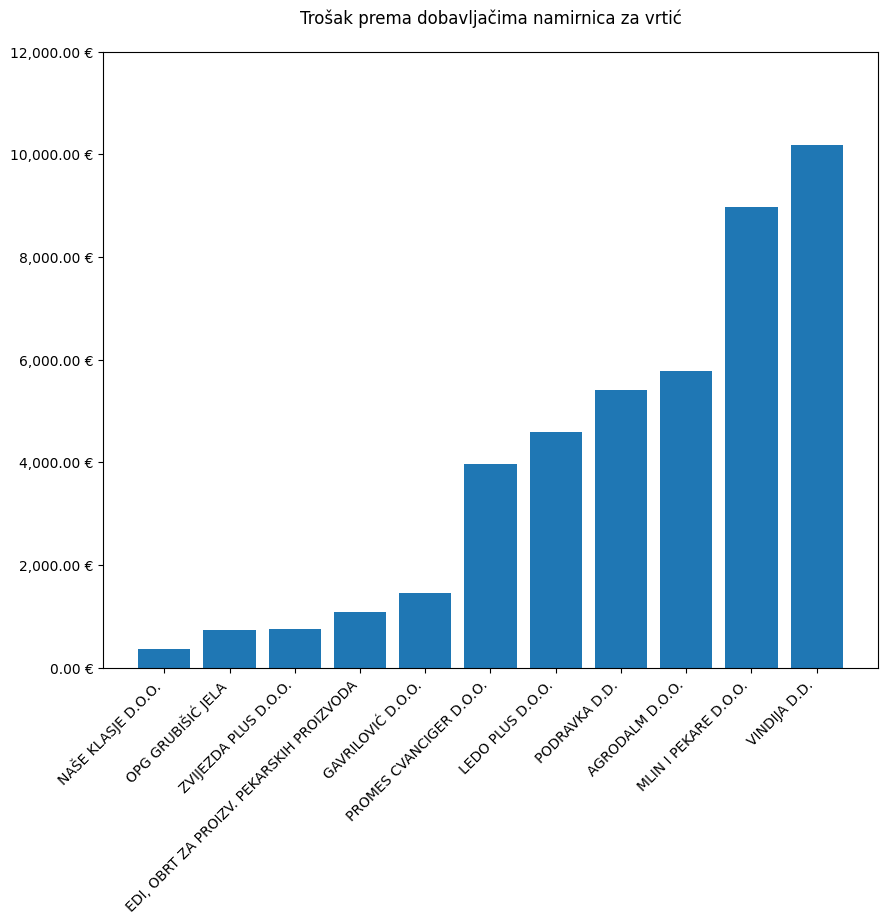

In [277]:
f, ax = plt.subplots(figsize=(10, 8))

ax.bar(troškovi_namirnica_dobavljači.index, troškovi_namirnica_dobavljači.values)
ax.set_xticks(ax.get_xticks())
current_values = ax.get_yticks()
ax.set_yticks(current_values)
ax.set_yticklabels(['{:,.2f} €'.format(x) for x in current_values])
ax.set_xticklabels(rotation=45, ha='right', labels=troškovi_namirnica_dobavljači.index)
ax.set_title('Trošak prema dobavljačima namirnica za vrtić', pad=20)

### Graf ovisnosti mjesečnih cijena namirnica o godišnjoj stopi inflacije

In [278]:
mjesecni_trosak_namirnica = namirnice_db.groupby('Mjesec')['Iznos'].sum()

In [279]:
mjesecni_trosak_namirnica.loc[1] = 2343.12
mjesecni_trosak_namirnica = pd.DataFrame(mjesecni_trosak_namirnica)
mjesecni_trosak_namirnica = mjesecni_trosak_namirnica.sort_index()

In [280]:
mjesecni_trosak_namirnica

,Iznos
Mjesec,
1.0,2343.12
5.0,1985.31
6.0,5165.79
7.0,1127.82
9.0,7138.87
10.0,3322.00
11.0,6493.98
12.0,18199.18


In [281]:
ts = pd.Series(mjesecni_trosak_namirnica['Iznos'])

In [282]:
ts

Mjesec
1.0      2343.12
5.0      1985.31
6.0      5165.79
7.0      1127.82
9.0      7138.87
10.0     3322.00
11.0     6493.98
12.0    18199.18
Name: Iznos, dtype: float64

In [283]:
IT = range(1, 13)
ts = ts.reindex(IT, fill_value=np.nan)
ts = ts.interpolate() # Interpolacija

In [284]:
ts

Mjesec
1      2343.1200
2      2253.6675
3      2164.2150
4      2074.7625
5      1985.3100
6      5165.7900
7      1127.8200
8      4133.3450
9      7138.8700
10     3322.0000
11     6493.9800
12    18199.1800
Name: Iznos, dtype: float64

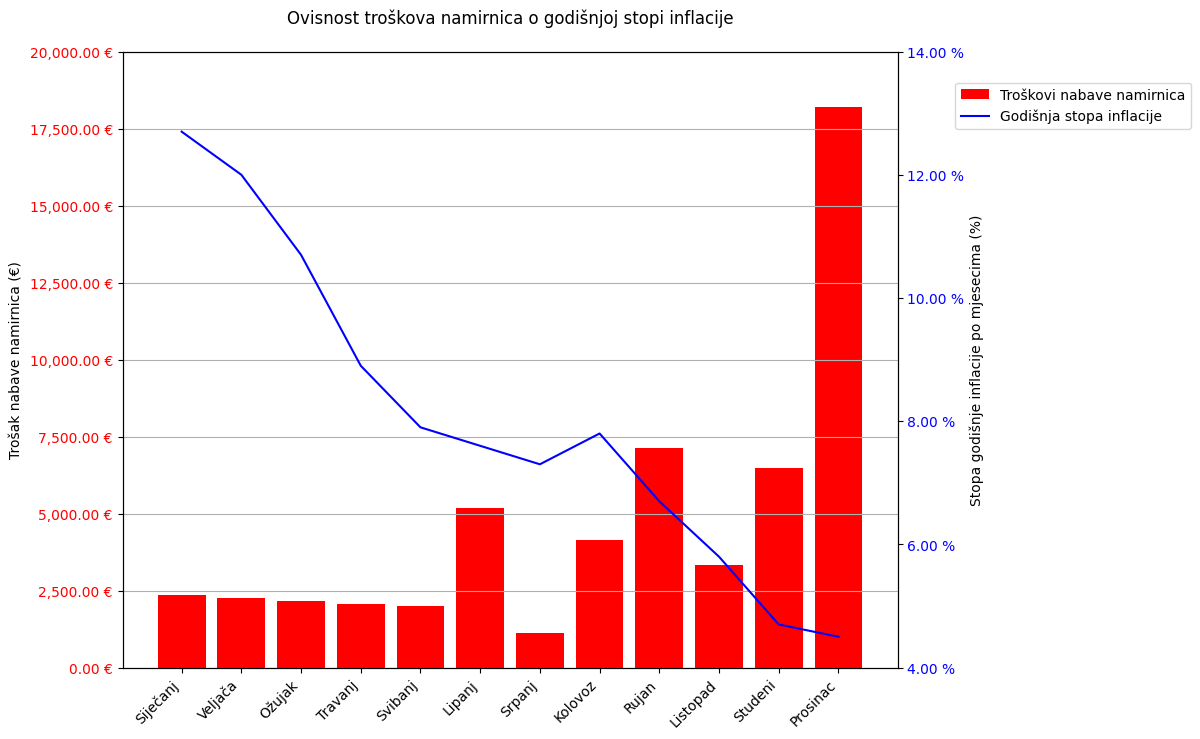

In [285]:
fig, ax1 = plt.subplots(figsize=(10,8))

ax1.bar(mjeseci, ts.values, color='red', label='Troškovi nabave namirnica')
ax1.set_ylabel('Trošak nabave namirnica (€)')
ax1.tick_params(axis='y', labelcolor='red')
current_values = ax1.get_yticks()
ax1.set_yticks(current_values)
ax1.set_yticklabels(['{:,.2f} €'.format(x) for x in current_values])
ax1.grid(True, axis='y')
ax1.set_xticks(mjeseci)
ax1.set_xticklabels(rotation=45, ha='right', labels=mjeseci)

ax2 = ax1.twinx()
ax2.plot(mjeseci, godisnja_inflacija['Godišnja stopa inflacije %'], color='blue', label='Godišnja stopa inflacije')
current_values = ax2.get_yticks()
ax2.set_yticks(current_values)
ax2.set_yticklabels(['{:,.2f} %'.format(x) for x in current_values])
ax2.set_ylabel('Stopa godišnje inflacije po mjesecima (%)')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Ovisnost troškova namirnica o godišnjoj stopi inflacije', pad=20)
fig.legend(loc='upper right', bbox_to_anchor=(1.2, 0.85))

plt.show()

# Broj i trošak građevinskih radova raspoređen po godišnjim dobima

Ručno izdvajanje građevinskih firmi i dodavanje dodatnog stupca za identifikaciju godišnjih doba. 

In [286]:
grad_db = df[df['Primatelj'].isin(['STRABAG D.O.O.', 'SWIETELSKY D.O.O.', 'PETROL PROM D.O.O.', 'M2 ING PLUS j.d.o.o.','INVESTINŽENJERING D.O.O.', 'Expertplan d.o.o.', 'TOMIĆ PROJEKTI J.D.O.O.', 'BAU GRADNJA D.O.O.', 'EPTISA ADRIA D.O.O.', 'SCGC SAVJETOVANJE D.O.O.', 'Z DIMENZIJA D.O.O.', 'INVESTINŽENJERING D.O.O.', 'ALFA-INŽENJERING D.O.O.', 'PLAN PLUS d.o.o.', 'MIPCRO D.O.O.', 'SPEGRA d.o.o.', 'GRAĐEVINSKI OBRT ŠPELIĆ, vl. N, Špelić', 'FERRUM OBRT ZA RESTAURACIJU PREDMETA OD', 'GRADNJA ALABER DOO', 'HEDOM D.O.O.', 'MATRICA ARHITEKTURA D.O.O.', 'GS GRAĐENJE, GRAĐEVINSKI OBRT'])]

In [287]:
grad_iznosi = grad_db.groupby('Primatelj')['Iznos'].sum()

In [288]:
grad_iznosi = grad_iznosi.sort_values(ascending=False)

In [289]:
grad_iznosi

Primatelj
STRABAG D.O.O.                             18008958.53
MIPCRO D.O.O.                               1787605.53
HEDOM D.O.O.                                1292744.66
BAU GRADNJA D.O.O.                          1076337.49
SWIETELSKY D.O.O.                           1065457.28
PETROL PROM D.O.O.                           832377.96
GS GRAĐENJE, GRAĐEVINSKI OBRT                436251.20
SPEGRA d.o.o.                                387748.99
GRADNJA ALABER DOO                           199466.47
GRAĐEVINSKI OBRT ŠPELIĆ, vl. N, Špelić       183618.80
SCGC SAVJETOVANJE D.O.O.                     182406.98
INVESTINŽENJERING D.O.O.                     168280.41
EPTISA ADRIA D.O.O.                          137601.61
FERRUM OBRT ZA RESTAURACIJU PREDMETA OD      106200.26
Z DIMENZIJA D.O.O.                            84982.13
M2 ING PLUS j.d.o.o.                          32388.96
MATRICA ARHITEKTURA D.O.O.                    29544.10
ALFA-INŽENJERING D.O.O.                       23667.69


### Prikaz prvih deset građevinskih firmi s najvećom zaradom

Text(0.5, 1.0, 'Trošak prema vodećim građevinskim firmama')

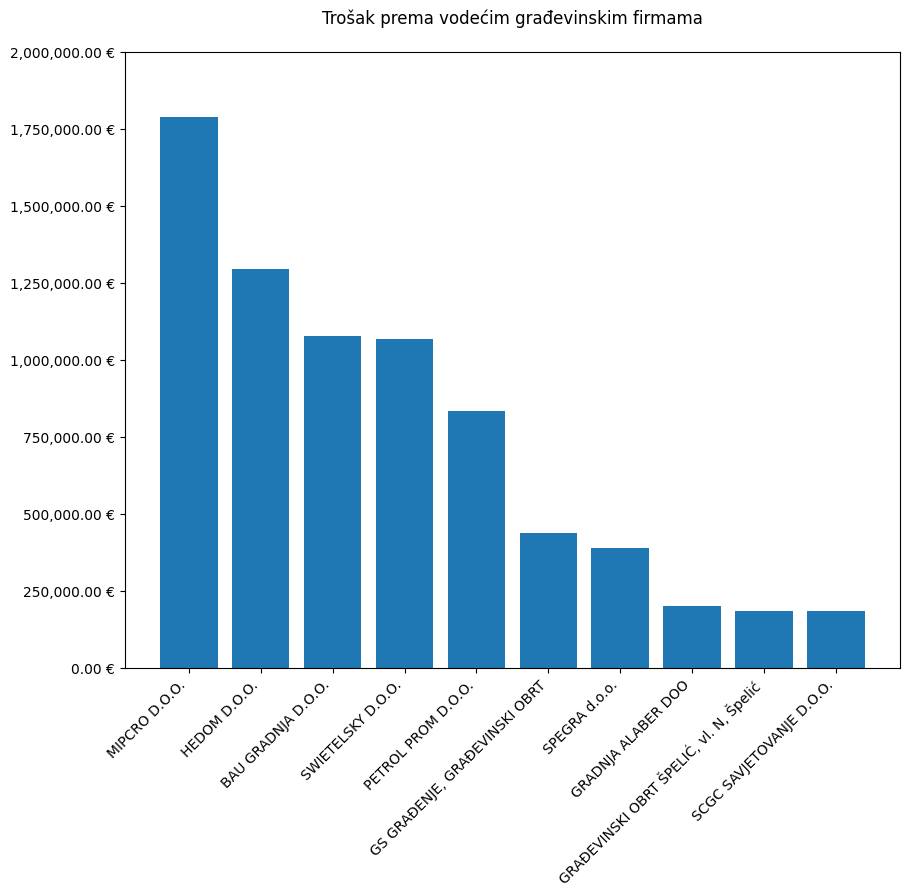

In [290]:
f, ax = plt.subplots(figsize=(10, 8))

ax.bar(grad_iznosi.iloc[1:11].index, grad_iznosi.iloc[1:11].values)
ax.set_xticks(ax.get_xticks())
current_values = ax.get_yticks()
ax.set_yticks(current_values)
ax.set_yticklabels(['{:,.2f} €'.format(x) for x in current_values])
ax.set_xticklabels(rotation=45, ha='right', labels=grad_iznosi.iloc[1:11].index)
ax.set_title('Trošak prema vodećim građevinskim firmama', pad=20)

In [291]:
grad_db

,Datum,Primatelj,OIB,Mjesto,Broj računa,Opis,Iznos,Datum računa,Datum dospijeća,IBAN,Proračunski Korisnik,Mjesec
5,2023-01-12,STRABAG D.O.O.,74971361430,10000 Zagreb,12132122,"r- 2474 - 5.PS ""PRIPREMA PROJEKTNO TEH.DOK. I ...",30714.97,2022-11-30T00:00:00.000Z,2023-01-12T00:00:00.000Z,HR2025000091101348564,Grad Petrinja,1.0
10,2023-01-12,PETROL PROM D.O.O.,32609134262,44250 Petrinja,99/1/4,r- 2558 - 17.PS MULTIFUNKCIONALNO IGRALIŠTE,14998.33,2022-10-31T00:00:00.000Z,2022-11-30T00:00:00.000Z,HR1323600001102842509,Grad Petrinja,1.0
12,2023-01-12,SWIETELSKY D.O.O.,46016050186,10000 Zagreb,371-1-1,r- 2472 - 5.PS RADOVI ( PRIPREMA PROJEKTNO TEH...,238939.01,2022-11-30T00:00:00.000Z,2023-01-12T00:00:00.000Z,HR7924840081100381380,Grad Petrinja,1.0
13,2023-01-12,STRABAG D.O.O.,74971361430,10000 Zagreb,12132122,"r- 2474 - 5.PS ""PRIPREMA PROJEKTNO TEH.DOK. I ...",427308.51,2022-11-30T00:00:00.000Z,2023-01-12T00:00:00.000Z,HR8724840081100367947,Grad Petrinja,1.0
48,2023-01-19,PETROL PROM D.O.O.,32609134262,44250 Petrinja,96/1/4,r- 2670 - 18.PS MULTIFUNKCIONALNO IGRALIŠTE UZ...,22117.70,2022-11-30T00:00:00.000Z,2022-12-30T00:00:00.000Z,HR1323600001102842509,Grad Petrinja,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5253,2023-12-29,PETROL PROM D.O.O.,32609134262,44250 Petrinja,89/1/4,22. P.S.,82717.14,2023-12-22T00:00:00.000Z,2024-01-21T00:00:00.000Z,HR4923400091110918910,Grad Petrinja,12.0
5254,2023-12-29,PETROL PROM D.O.O.,32609134262,44250 Petrinja,86/1/4,21.P.S. TRŽNICA (PETROL PROM),55529.63,2023-11-30T00:00:00.000Z,2023-12-30T00:00:00.000Z,HR7823600001102165637,Grad Petrinja,12.0
5255,2023-12-29,PETROL PROM D.O.O.,32609134262,44250 Petrinja,89/1/4,22.P.S. TRŽNICA (PETROL PROM),8041.38,2023-12-22T00:00:00.000Z,2024-01-21T00:00:00.000Z,HR6124070001100133864,Grad Petrinja,12.0
5256,2023-12-29,PETROL PROM D.O.O.,32609134262,44250 Petrinja,86/1/4,21.P.S. REKONSTRUKCIJA TRŽNICE,66972.03,2023-11-30T00:00:00.000Z,2023-12-30T00:00:00.000Z,HR4923400091110918910,Grad Petrinja,12.0


### Određivanje godišnjih doba izvođenja građevinskih radova

In [292]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Zima'
    elif month in [3, 4, 5]:
        return 'Proljeće'
    elif month in [6, 7, 8]:
        return 'Ljeto'
    elif month in [9, 10, 11]:
        return 'Jesen'
    else:
        return 'Unknown'

In [306]:
grad_db.loc[:, 'Season'] = grad_db.loc[:, 'Mjesec'].apply(get_season)

In [294]:
grad_db

,Datum,Primatelj,OIB,Mjesto,Broj računa,Opis,Iznos,Datum računa,Datum dospijeća,IBAN,Proračunski Korisnik,Mjesec,Season
5,2023-01-12,STRABAG D.O.O.,74971361430,10000 Zagreb,12132122,"r- 2474 - 5.PS ""PRIPREMA PROJEKTNO TEH.DOK. I ...",30714.97,2022-11-30T00:00:00.000Z,2023-01-12T00:00:00.000Z,HR2025000091101348564,Grad Petrinja,1.0,Zima
10,2023-01-12,PETROL PROM D.O.O.,32609134262,44250 Petrinja,99/1/4,r- 2558 - 17.PS MULTIFUNKCIONALNO IGRALIŠTE,14998.33,2022-10-31T00:00:00.000Z,2022-11-30T00:00:00.000Z,HR1323600001102842509,Grad Petrinja,1.0,Zima
12,2023-01-12,SWIETELSKY D.O.O.,46016050186,10000 Zagreb,371-1-1,r- 2472 - 5.PS RADOVI ( PRIPREMA PROJEKTNO TEH...,238939.01,2022-11-30T00:00:00.000Z,2023-01-12T00:00:00.000Z,HR7924840081100381380,Grad Petrinja,1.0,Zima
13,2023-01-12,STRABAG D.O.O.,74971361430,10000 Zagreb,12132122,"r- 2474 - 5.PS ""PRIPREMA PROJEKTNO TEH.DOK. I ...",427308.51,2022-11-30T00:00:00.000Z,2023-01-12T00:00:00.000Z,HR8724840081100367947,Grad Petrinja,1.0,Zima
48,2023-01-19,PETROL PROM D.O.O.,32609134262,44250 Petrinja,96/1/4,r- 2670 - 18.PS MULTIFUNKCIONALNO IGRALIŠTE UZ...,22117.70,2022-11-30T00:00:00.000Z,2022-12-30T00:00:00.000Z,HR1323600001102842509,Grad Petrinja,1.0,Zima
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5253,2023-12-29,PETROL PROM D.O.O.,32609134262,44250 Petrinja,89/1/4,22. P.S.,82717.14,2023-12-22T00:00:00.000Z,2024-01-21T00:00:00.000Z,HR4923400091110918910,Grad Petrinja,12.0,Zima
5254,2023-12-29,PETROL PROM D.O.O.,32609134262,44250 Petrinja,86/1/4,21.P.S. TRŽNICA (PETROL PROM),55529.63,2023-11-30T00:00:00.000Z,2023-12-30T00:00:00.000Z,HR7823600001102165637,Grad Petrinja,12.0,Zima
5255,2023-12-29,PETROL PROM D.O.O.,32609134262,44250 Petrinja,89/1/4,22.P.S. TRŽNICA (PETROL PROM),8041.38,2023-12-22T00:00:00.000Z,2024-01-21T00:00:00.000Z,HR6124070001100133864,Grad Petrinja,12.0,Zima
5256,2023-12-29,PETROL PROM D.O.O.,32609134262,44250 Petrinja,86/1/4,21.P.S. REKONSTRUKCIJA TRŽNICE,66972.03,2023-11-30T00:00:00.000Z,2023-12-30T00:00:00.000Z,HR4923400091110918910,Grad Petrinja,12.0,Zima


### Grafički prikaz radova po godišnjim dobima

In [295]:
god_doba_iznosi = grad_db.groupby('Season')['Iznos'].sum()

In [296]:
god_doba_iznosi.sort_values(ascending=False)

Season
Zima        7929803.95
Proljeće    7189463.79
Ljeto       6164127.29
Jesen       4777994.01
Name: Iznos, dtype: float64

In [297]:
print('Građevinski radovi po godišnjim dobima')
table = PrettyTable(['Godišnje doba', 'Trošak radova'])
for item in god_doba_iznosi.items():
    table.add_row([item[0], item[1]])
print(table)

Građevinski radovi po godišnjim dobima
+---------------+---------------+
| Godišnje doba | Trošak radova |
+---------------+---------------+
|     Jesen     |   4777994.01  |
|     Ljeto     |   6164127.29  |
|    Proljeće   |   7189463.79  |
|      Zima     |   7929803.95  |
+---------------+---------------+


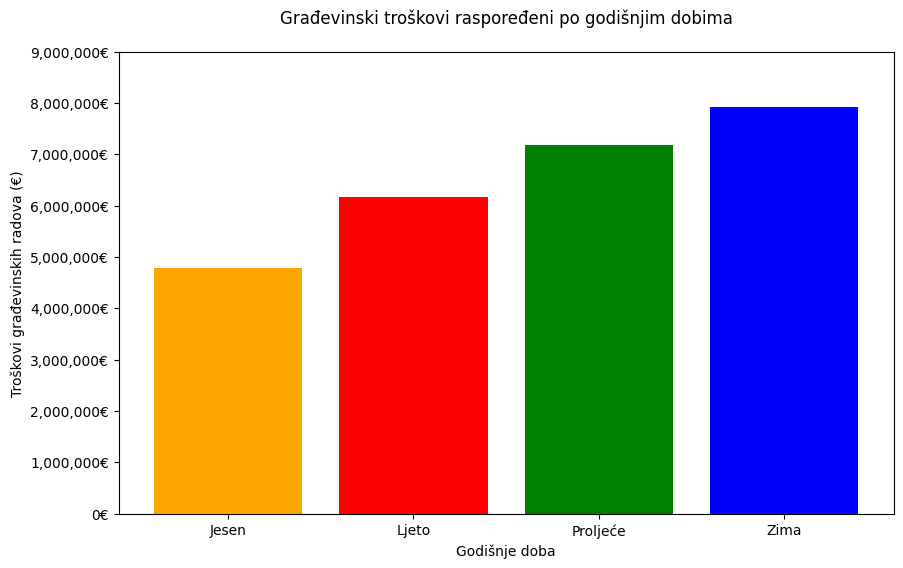

In [298]:
bar_colors = ['orange', 'red', 'green', 'blue']

fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(god_doba_iznosi.index, god_doba_iznosi.values, color=bar_colors)
current_values = plt.gca().get_yticks()
plt.gca().set_yticks(current_values)
plt.gca().set_yticklabels(['{:,.0f}€'.format(x) for x in current_values])
plt.ylabel('Troškovi građevinskih radova (€)')
plt.xlabel('Godišnje doba')
plt.title('Građevinski troškovi raspoređeni po godišnjim dobima', pad=20)
plt.show()

## Kategorizacija tipa računa prema frekvenciji plaćanja

In [302]:
df = pd.read_excel('isplate.xlsx')
df = df.iloc[:, :16]
df.drop_duplicates(keep='first')


,Datum,Primatelj,OIB,Mjesto,Broj računa,Opis,Iznos,Datum računa,Datum dospijeća,IBAN,Proračunski Korisnik,Poziv na broj,Pozicija,Iznos na poziciji,Organizacijska klasifikacija,Programska klasifikacija
0,2023-01-13T00:00:00.000Z,POSLOVNE ZONE PETRINJA D.O.O.,95901449200,44250 Petrinja,1166-POSL111-1,r- 2628 - ODRŽAVANJE 12-2022,25533.8,2022-12-30T00:00:00.000Z,2022-12-30T00:00:00.000Z,HR0824020061100574009,NaN,HR00 1166-22,R3307 Usluge održavanja imovine - Poslovne zon...,25533.8,030 01 UPRAVNI ODJEL ZA DRUŠTVENE DJELAT...,A01 3006A300001 ODRŽAVANJE IMOVINE
1,2023-01-13T00:00:00.000Z,CODE ARCHITECT D.O.O.,79015812022,10000 Zagreb,53-VP1-1,r- 2052 - ARHITEKTONSKA SNIMKA POSTOJEĆEG STAN...,2986.26,2022-10-21T00:00:00.000Z,2022-11-17T00:00:00.000Z,HR1624020061100887563,NaN,HR00 53-1-1,R3351 Kapitalne pomoći kreditnim i ostalim fin...,2986.26,030 01 UPRAVNI ODJEL ZA DRUŠTVENE DJELAT...,A01 3007K300001 OBNOVA POJEDINAČNO ZAŠTIĆENIH ...
2,2023-01-12T00:00:00.000Z,BELONA D.O.O.,37208339420,44250 Petrinja,874-P2-1-1,"Belona, ostali materijal",4.53,2022-12-31T00:00:00.000Z,2022-09-12T00:00:00.000Z,HR5123600001101212322,DJEČJI VRTIĆ PETRINJČICA,HR00 874,R3607 Materijal i dijelovi za tekuće i investi...,4.53,030 03 28838 DJEČJI VRTIĆ PETRINJ...,A01 3101A300001 REDOVAN RAD DJEČJEG VRTIĆA PET...
3,2023-01-12T00:00:00.000Z,PEPA NET J.D.O.O.,22442802027,10370 Dugo Selo,55/01/221,Racun br.: 55/01/221,598.54,2022-12-31T00:00:00.000Z,2022-12-26T00:00:00.000Z,HR4723600001102641689,DJEČJI VRTIĆ PETRINJČICA,HR01 122556,R3605 Uredski materijal i ostali materijalni r...,598.54,030 03 28838 DJEČJI VRTIĆ PETRINJ...,A01 3101A300001 REDOVAN RAD DJEČJEG VRTIĆA PET...
4,2023-01-12T00:00:00.000Z,INSTITUT IGH D.D.,79766124714,10000 Zagreb,2899-ZG-49048,r- 2503 - ISPITIVANJE MATERIJALA I ISPITIVANJE...,1990.84,2022-11-30T00:00:00.000Z,2023-01-04T00:00:00.000Z,HR7723600001101243767,NaN,HR00 2899-4904822,R4300 Intelektualne usluge - geomehanički istr...,1990.84,040 01 UPRAVNI ODJEL ZA PROSTORNO UREĐEN...,A01 4003T400001 IZRADA PROSTORNO - PLANSKE DOK...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5208,2023-09-18T00:00:00.000Z,HP-HRVATSKA POŠTA D.D.,87311810356,10000 Zagreb,7201-11005-2,Usluge pošte za 04/2023,21.4,2023-04-30T00:00:00.000Z,2023-05-15T00:00:00.000Z,HR1623900011100018674,DJEČJI VRTIĆ PETRINJČICA,HR05 110051-023-00005599,"R3617 Usluge telefona, pošte i prijevoza",21.4,030 03 28838 DJEČJI VRTIĆ PETRINJ...,A01 3101A300001 REDOVAN RAD DJEČJEG VRTIĆA PET...
5209,2023-09-18T00:00:00.000Z,HP-HRVATSKA POŠTA D.D.,87311810356,10000 Zagreb,8795-11005-2,TRANSAKCIJSKI RAČUN,43.91,2023-05-31T00:00:00.000Z,2023-06-16T00:00:00.000Z,HR1623900011100018674,DJEČJI VRTIĆ PETRINJČICA,HR05 110051-023-00007208,"R3617 Usluge telefona, pošte i prijevoza",43.91,030 03 28838 DJEČJI VRTIĆ PETRINJ...,A01 3101A300001 REDOVAN RAD DJEČJEG VRTIĆA PET...
5210,2023-09-18T00:00:00.000Z,Redwood d.o.o.,48611539900,44000 Sisak,146/1/1,Računalne usluge,237.5,2023-08-10T00:00:00.000Z,2023-09-09T00:00:00.000Z,HR4124840081135285477,PETRA - PETRINJSKA RAZVOJNA AGENCIJA,HR00 146-2023,R5521 Računalne usluge,237.5,050 02 50057 PETRA - PETRINJSKA R...,A01 5100A500001 REDOVAN RAD PETRA - PETRINJSKE...
5211,2023-09-18T00:00:00.000Z,Redwood d.o.o.,48611539900,44000 Sisak,148/1/1,Mikrotik ruter,362.5,2023-08-22T00:00:00.000Z,2023-09-21T00:00:00.000Z,HR4124840081135285477,PETRA - PETRINJSKA RAZVOJNA AGENCIJA,HR00 148-2023,R5529 Uredska oprema i namještaj,362.5,050 02 50057 PETRA - PETRINJSKA R...,A01 5100K500002 OPREMANJE PETRA - PETRINJSKE R...


In [304]:
df['Datum'] = pd.to_datetime(df['Datum'],  errors='coerce')

one_month = pd.DateOffset(months=1)
three_months = pd.DateOffset(months=3)
six_months = pd.DateOffset(months=6)
one_year = pd.DateOffset(years=1)

df['Payment_1M'] = df['Datum'] + one_month
df['Payment_3M'] = df['Datum'] + three_months
df['Payment_6M'] = df['Datum'] + six_months
df['Payment_1Y'] = df['Datum'] + one_year

grouped = df.groupby('Programska klasifikacija')


one_month_recipes = []
three_months_recipes = []
six_months_recipes = []
one_year_recipes = []

for recipe, group in grouped:
    within_one_year = group[group['Datum'] < group['Payment_1Y']]
    
    if not within_one_year.empty:
        if within_one_year['Datum'].max() <= group['Payment_1M'].min():
            one_month_recipes.append(recipe)
        elif within_one_year['Datum'].max() <= group['Payment_3M'].min():
            three_months_recipes.append(recipe)
        elif within_one_year['Datum'].max() <= group['Payment_6M'].min():
            six_months_recipes.append(recipe)
        else:
            one_year_recipes.append(recipe)

# Display the results
print("Računi koji se plaćaju svaki mjesec:")
print(one_month_recipes)

print("\nRačuni koji se plaćaju svaka 3 mjeseca:")
print(three_months_recipes)

print("\nRačuni koji se plaćaju svakih 6 mjeseci:")
print(six_months_recipes)

print("\nRačuni na godišnjoj razini:")
print(one_year_recipes)

Računi koji se plaćaju svaki mjesec:
['A01 1000T100005 NOVA GEODETSKA IZMJERA GRADA', 'A01 1001K100001 ULAGANJE U OBJEKTE GRADSKIH ČETVRTI I MJESNIH ODBORA', 'A01 1002A100001 REDOVAN RAD VIJEĆA BOŠNJAČKE NACIONALNE MANJINE', 'A01 3001A300001 SOCIJALNA ZAŠTITA', 'A01 3001A300002 JEDNOKRATNA NOVČANA NAKNADA', 'A01 3001A300004 POMOĆ DJECI S TEŠKOĆAMA U RAZVOJU', 'A01 3001A300009 DONACIJE CRVENOM KRIŽU', 'A01 3003A300001 STIPENDIJE I NAGRADE UČENICIMA I STUDENTIMA', 'A01 3003A300003 SUBVENCIJE PRIJEVOZA STUDENATA I PREDŠKOLSKE DJECE', 'A01 3003A300008 PARTNERSTVO S UDRUGAMA - SUFINANCIRANJE PROGRAMA I PROJEKATA', 'A01 3003K300001 ULAGANJE U OBJEKTE PREDŠKOLSKOG ODGOJA', 'A01 3004K300005 OPREMANJE SPORTSKIH OBJEKATA', 'A01 3004K300006 ULAGANJE U SPORTSKE OBJEKTE I IGRALIŠTA', 'A01 3005A300001 REDOVITI RAD CIVILNE ZAŠTITE', 'A01 3005T300001 UKLANJANJE OBJEKATA', 'A01 3102A300006 AKTIVNOSTI U ZAJEDNICI', 'A01 4001A410004 ODRŽAVANJE GRAĐEVINA, UREĐAJA I PREDMETA JAVNE NAMJENE', 'A01 4001A41000

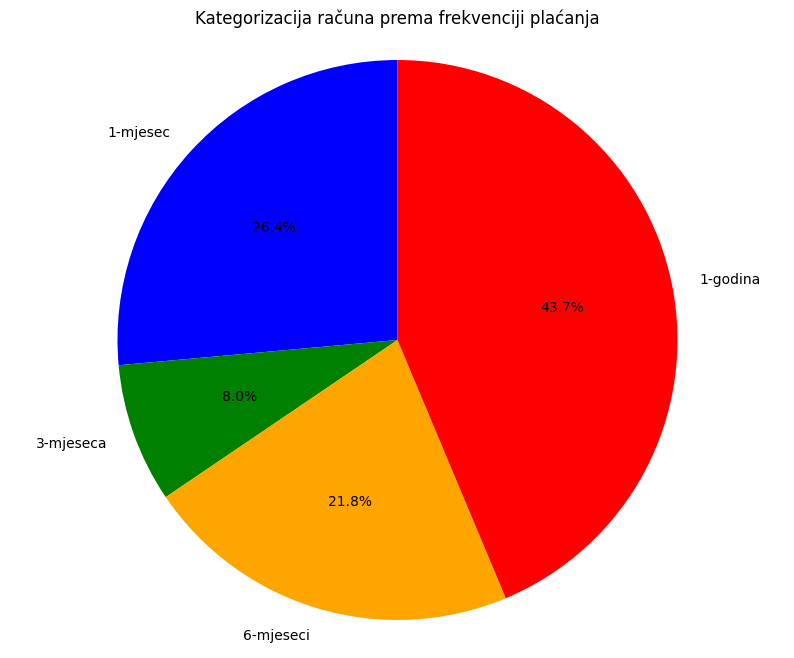

In [305]:
categories = ['1-mjesec', '3-mjeseca', '6-mjeseci', '1-godina']
counts = [len(one_month_recipes), len(three_months_recipes), len(six_months_recipes), len(one_year_recipes)]

plt.figure(figsize=(10, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'orange', 'red'])
plt.axis('equal')  
plt.title('Kategorizacija računa prema frekvenciji plaćanja')
plt.show()